# Grafici QD e Difetto VS Intensità

Per la regione 1 è tutto lineare: ci sono solo due picchi!

Per la regione 2 la questione cambia: spesso ce ne sono 3 e bisogna capire quale va dove!

## Preparazione e estrazione dati

In [121]:
from picchi_GaAs import raccoglitore_2 # picchi reference
from QM2.varshni_subroutines import *
from math import sqrt

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=1', 'ass=0']
# dopo i 100K i qd scompaiono
arr_temperatura = [15, 30, 45, 70, 100, 150]

medie = {}
fwhm = {}
intensità = {}

In [122]:
# OCCHIO! QUESTE SONO INVERTITE!!!
etichette_x = ["ass=1\nemi=0", 
               "ass=0\nemi=0.5", 
               "ass=0\nemi=1", 
               "ass=0\nemi=1.5", 
               "ass=0\nemi=2", 
               "ass=0\nemi=2.5", 
               "ass=0\nemi=3"]

In [123]:
etichette_x = ["ass=0\nemi=1", 
               "ass=0.5\nemi=0", 
               "ass=1\nemi=0", 
               "ass=1.5\nemi=0", 
               "ass=2\nemi=0", 
               "ass=2.5\nemi=0", 
               "ass=3\nemi=0"]

In [124]:
for i, temp in enumerate(arr_temperatura):
    temp = str(temp)
    medie[temp] = {}
    fwhm[temp] = {}
    intensità[temp] = {}
    
    for ass in d_o_ass:
            
            medie[temp][ass] = {}
            fwhm[temp][ass] = {}
            intensità[temp][ass] = {}
            
            emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
            
            # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
            for emi in emi_list:
                
                medie[temp][ass][emi] = []
                fwhm[temp][ass][emi] = None
                intensità[temp][ass][emi] = None
                
                # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                '''
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                    picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][0]         
                    sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][2]
                    int_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][3]
                else:
                    picco_sx, sigma_sx, int_sx = 0, 0, 0
                    
                if len(raccoglitore_2[ass][emi][i]['Regione 2']) > 1:
                    picco_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][0]
                    sigma_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][2]
                    int_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][3]
                else:
                    picco_dx, sigma_dx, int_dx = 0, 0, 0
                '''    
                # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                # la regione di sx richiede attenzione particolare:
                # può capitare che ci sia un picco fittizio tra sx1 e sx2
                # può capitare anche che ci sia solo il picco sx2
                if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 1:
                    if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][0][0] < 800:
                        picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][0]
                        sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][2]
                        int_sx = raccoglitore_2[ass][emi][i]['Regione 1'][0][3]
                    else:
                        picco_sx, sigma_sx, int_sx = 0, 0, 0
                elif len(raccoglitore_2[ass][emi][i]['Regione 1']) > 1:
                    # se sono tre allora c'è sicuramente il pezzotto in mezzo
                    if len(raccoglitore_2[ass][emi][i]['Regione 1']) == 3:
                        picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][2][0]
                        sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][2][2]
                        int_sx = raccoglitore_2[ass][emi][i]['Regione 1'][2][3]
                    # se sono due si deve verificare che il secondo sia nel posto giusto
                    elif len(raccoglitore_2[ass][emi][i]['Regione 1']) == 2:
                        if 747 < raccoglitore_2[ass][emi][i]['Regione 1'][1][0] < 800:
                            picco_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][0]
                            sigma_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][2]
                            int_sx = raccoglitore_2[ass][emi][i]['Regione 1'][1][3]
                        else:
                            picco_sx, sigma_sx, int_sx = 0, 0, 0
                else:
                    picco_sx, sigma_sx, int_sx = 0, 0, 0
                    
                # qua vedo di scriverlo in modo che funzioni nel nuovo sistema
                '''if len(raccoglitore_2[ass][emi][i]['Regione 2']) == 1:
                    picco_dx, sigma_dx, int_dx = 0, 0, 0
                elif len(raccoglitore_2[ass][emi][i]['Regione 2']) == 2:
                    if 
                    picco_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][0]
                    sigma_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][2]
                    int_dx = raccoglitore_2[ass][emi][i]['Regione 2'][1][3]
                elif len(raccoglitore_2[ass][emi][i]['Regione 2']) == 3:
                    picco_dx = raccoglitore_2[ass][emi][i]['Regione 2'][2][0]
                    sigma_dx = raccoglitore_2[ass][emi][i]['Regione 2'][2][2]
                    int_dx = raccoglitore_2[ass][emi][i]['Regione 2'][2][3]
                else:
                    print('EH MA ZIO PERA')
                    picco_dx, sigma_dx, int_dx = 0, 0, 0'''
                
                # il più alto, ultimo elemento di help, è sempre il picco bulk
                help = sorted(raccoglitore_2[ass][emi][i]['Regione 2'], key=lambda x: x[3])
                
                # Caso con due elementi: prendo l'unico diverso dal picco fisso
                if len(help) == 2:
                    picco_dx = help[0][0]
                    sigma_dx = help[0][2]
                    int_dx   = help[0][3]

                # Caso con tre elementi
                elif len(help) == 3:
                    # Isolo i due valori non bulk
                    help_2 = [help[0], help[1]]

                    # Riordino per lunghezza d'onda (prima entrata)
                    help_2.sort(key=lambda x: x[0])

                    # Controllo i confronti con il picco bulk
                    if help_2[0][0] > help[2][0] and help_2[1][0] > help[2][0]:  # Entrambi maggiori
                        picco_dx = help_2[0][0] # Entrambi maggiori → prendo il minore
                        sigma_dx = help_2[0][2]
                        int_dx   = help_2[0][3]  
                    elif help_2[0][0] < help[2][0] and help_2[1][0] < help[2][0]:  # Entrambi minori
                        picco_dx = help_2[1][0] # Entrambi minori → prendo il maggiore
                        sigma_dx = help_2[1][2]
                        int_dx   = help_2[1][3]  
                    else:
                        picco_dx = help_2[1][0] # Uno da una parte, uno dall'altra → prendo quello a destra
                        sigma_dx = help_2[1][2]
                        int_dx   = help_2[1][3]   

                else:
                    print('Condizione imprevista!')
                
                
                # - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                
                # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
                # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
                err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
                err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
                
                # conversione delle sigma in eV
                sigma_sx = err_lambda_to_E (picco_sx, sigma_sx)
                sigma_dx = err_lambda_to_E (picco_dx, sigma_dx)
                
                # conversione dei nm in eV dei picchi
                picco_sx = lambda_to_E(picco_sx)
                picco_dx = lambda_to_E(picco_dx)  
                
                # conversione delle sigma in fwhm 
                # TODO: OCCHIO CHE SONO IN nm! PENSARE SE SI VOGLIONO METTERE IN eV
                fwhm_sx = sigma_sx * 2.35482004503 # 2*sqrt( 2*ln(2) )
                fwhm_dx = sigma_dx * 2.35482004503
                
                # calcolo intensità 
                A_sx = int_sx * sigma_sx * sqrt(2*np.pi)
                A_dx = int_dx * sigma_dx * sqrt(2*np.pi)
                
                # riempimento dei contenitori 
                medie[temp][ass][emi].append(picco_sx)
                medie[temp][ass][emi].append(err_picco_sx)
                medie[temp][ass][emi].append(picco_dx)
                medie[temp][ass][emi].append(err_picco_dx)
                
                fwhm[temp][ass][emi] = [fwhm_sx, fwhm_dx]
                
                intensità[temp][ass][emi] = [A_sx, A_dx]
                
                

In [125]:
medie['15']['ass=1']

{'emi=0': [np.float64(1.654930521182024),
  np.float64(0.0016585654733804172),
  np.float64(1.5140417564151711),
  np.float64(0.0013881896277585161)]}

## Plot Energia su Intensità

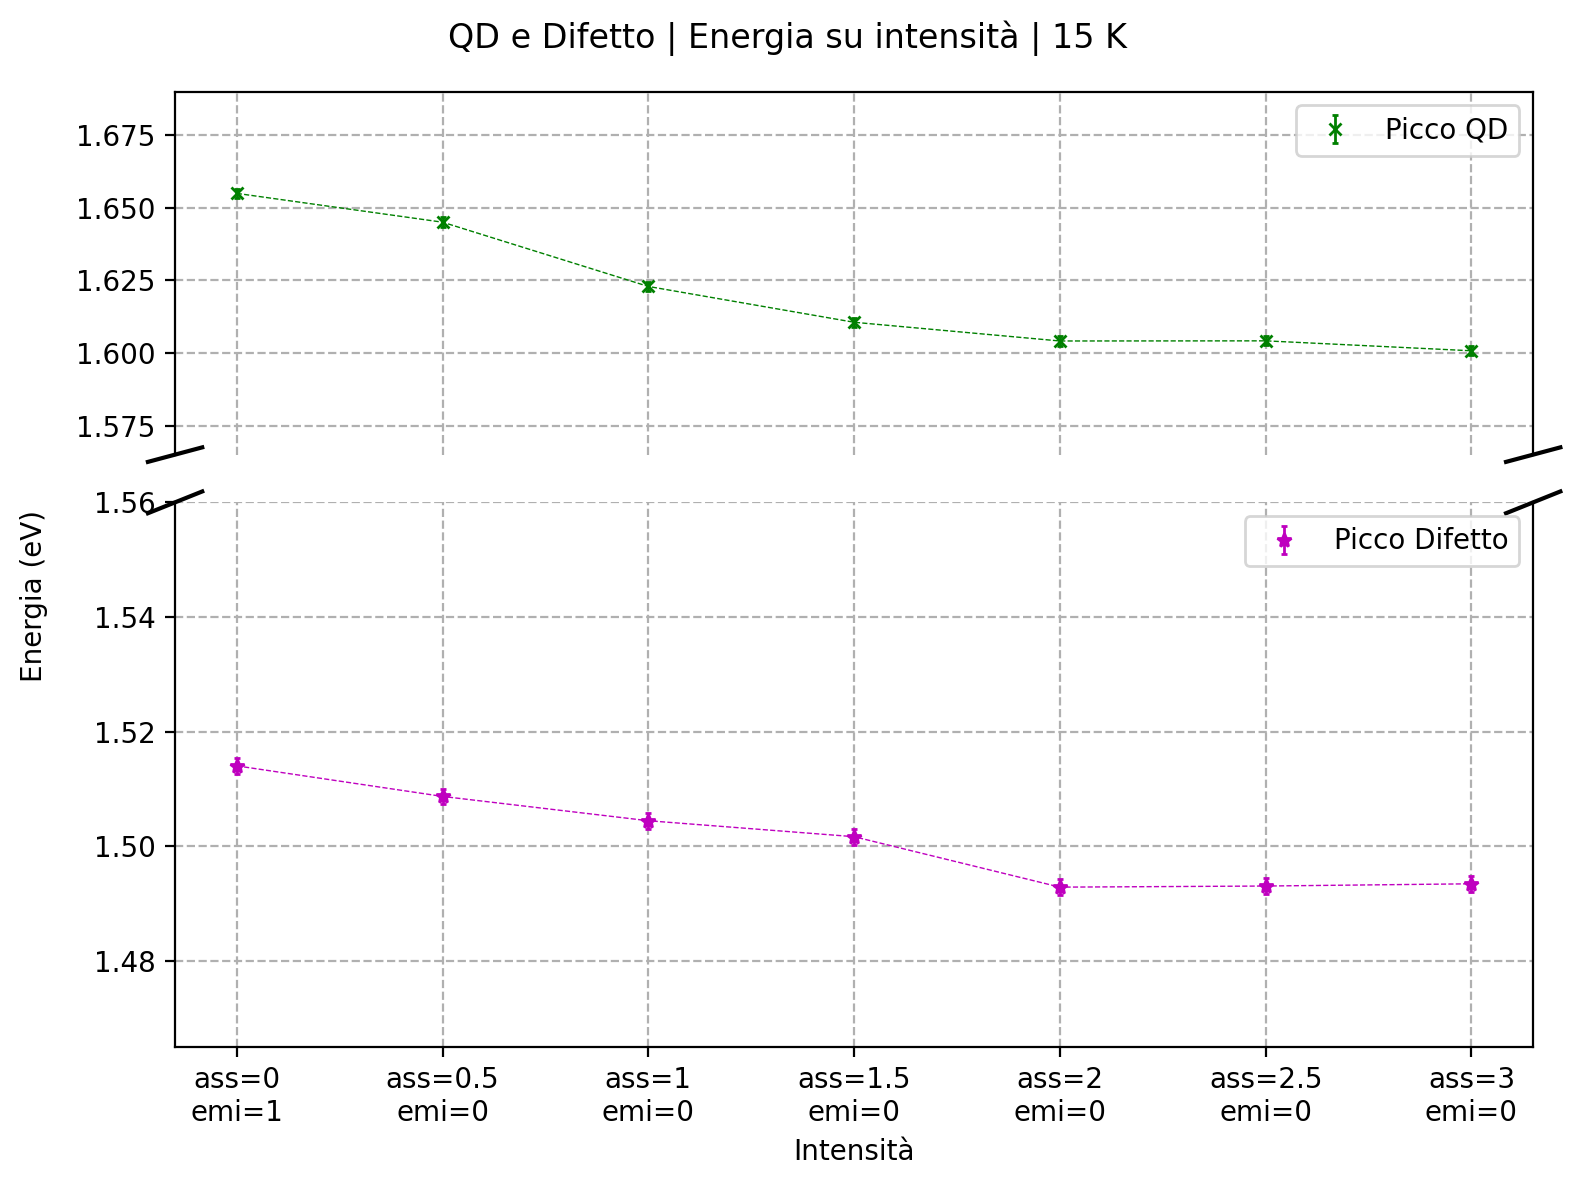

picco QD:
[np.float64(1.654930521182024), np.float64(1.6450112181896221), np.float64(1.6228922448201926), np.float64(1.610560639996343), np.float64(1.6041192063237277), np.float64(1.6041674105780828), np.float64(1.6007491303678876)]
errore picco QD:
[np.float64(0.0016585654733804172), np.float64(0.0016387428779170566), np.float64(0.0015949697810144102), np.float64(0.0015708230010090952), np.float64(0.0015582831217171049), np.float64(0.001558376776857306), np.float64(0.0015517424406785415)]
picco Difetto:
[np.float64(1.5140417564151711), np.float64(1.5087104734073682), np.float64(1.5044707829861772), np.float64(1.5016873716272114), np.float64(1.4928884756661156), np.float64(1.4930818789554188), np.float64(1.4934713965377195)]
errore picco Difetto:
[np.float64(0.0013881896277585161), np.float64(0.0013784305814936344), np.float64(0.0013706942959253383), np.float64(0.0013656271628544913), np.float64(0.0013496707013302698), np.float64(0.0013500204229144328), np.float64(0.0013507249057586347

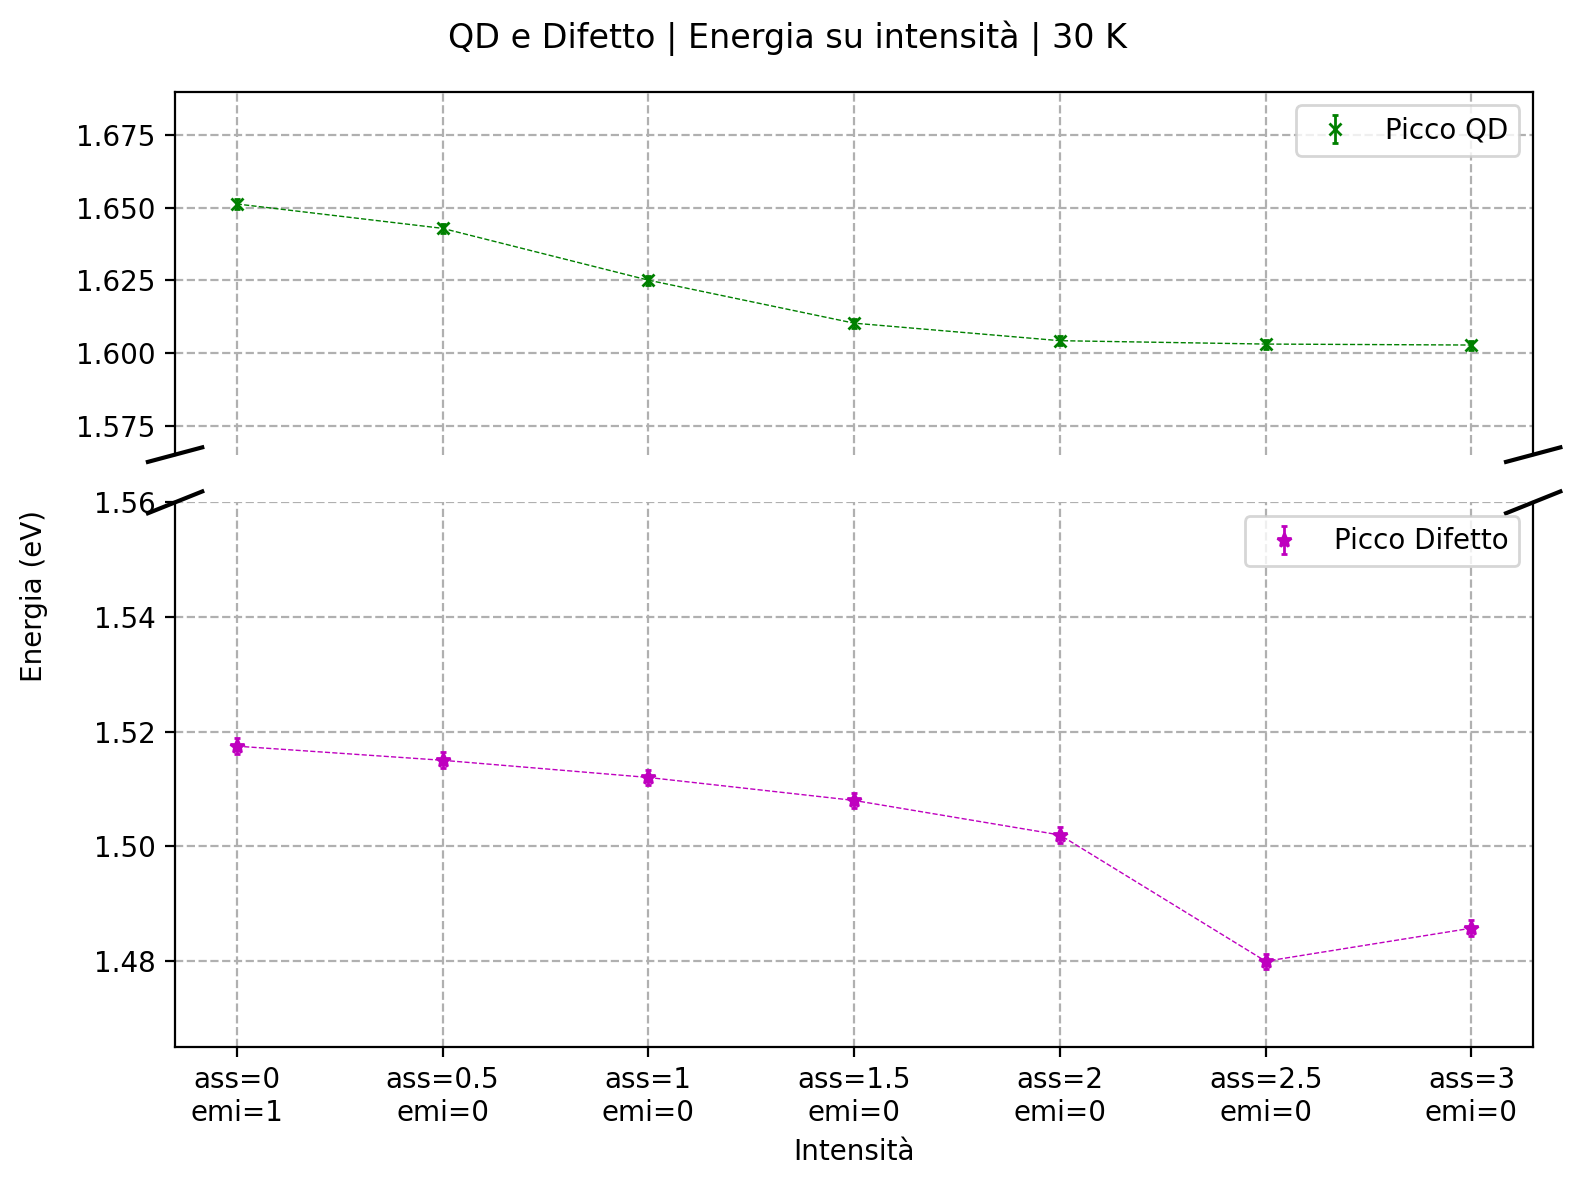

picco QD:
[np.float64(1.6512838328096695), np.float64(1.6428916031072434), np.float64(1.625060897186299), np.float64(1.610253455023939), np.float64(1.6042236922845814), np.float64(1.6030599270427852), np.float64(1.6027252636364233)]
errore picco QD:
[np.float64(0.0016512641304216535), np.float64(0.0016345225221436463), np.float64(0.0015992353088930076), np.float64(0.0015702238466636536), np.float64(0.0015584861290887458), np.float64(0.0015562257783315013), np.float64(0.0015555760740409478)]
picco Difetto:
[np.float64(1.517472229224669), np.float64(1.5150138218617568), np.float64(1.5120173501538412), np.float64(1.5080125202729475), np.float64(1.5019878674828093), np.float64(1.4799596237332129), np.float64(1.4857346799364028)]
errore picco Difetto:
[np.float64(0.001394487395598409), np.float64(0.0013899727283213444), np.float64(0.0013844798476538628), np.float64(0.00137715550927103), np.float64(0.001366173756464659), np.float64(0.0013263948395208463), np.float64(0.0013367666766287247)]


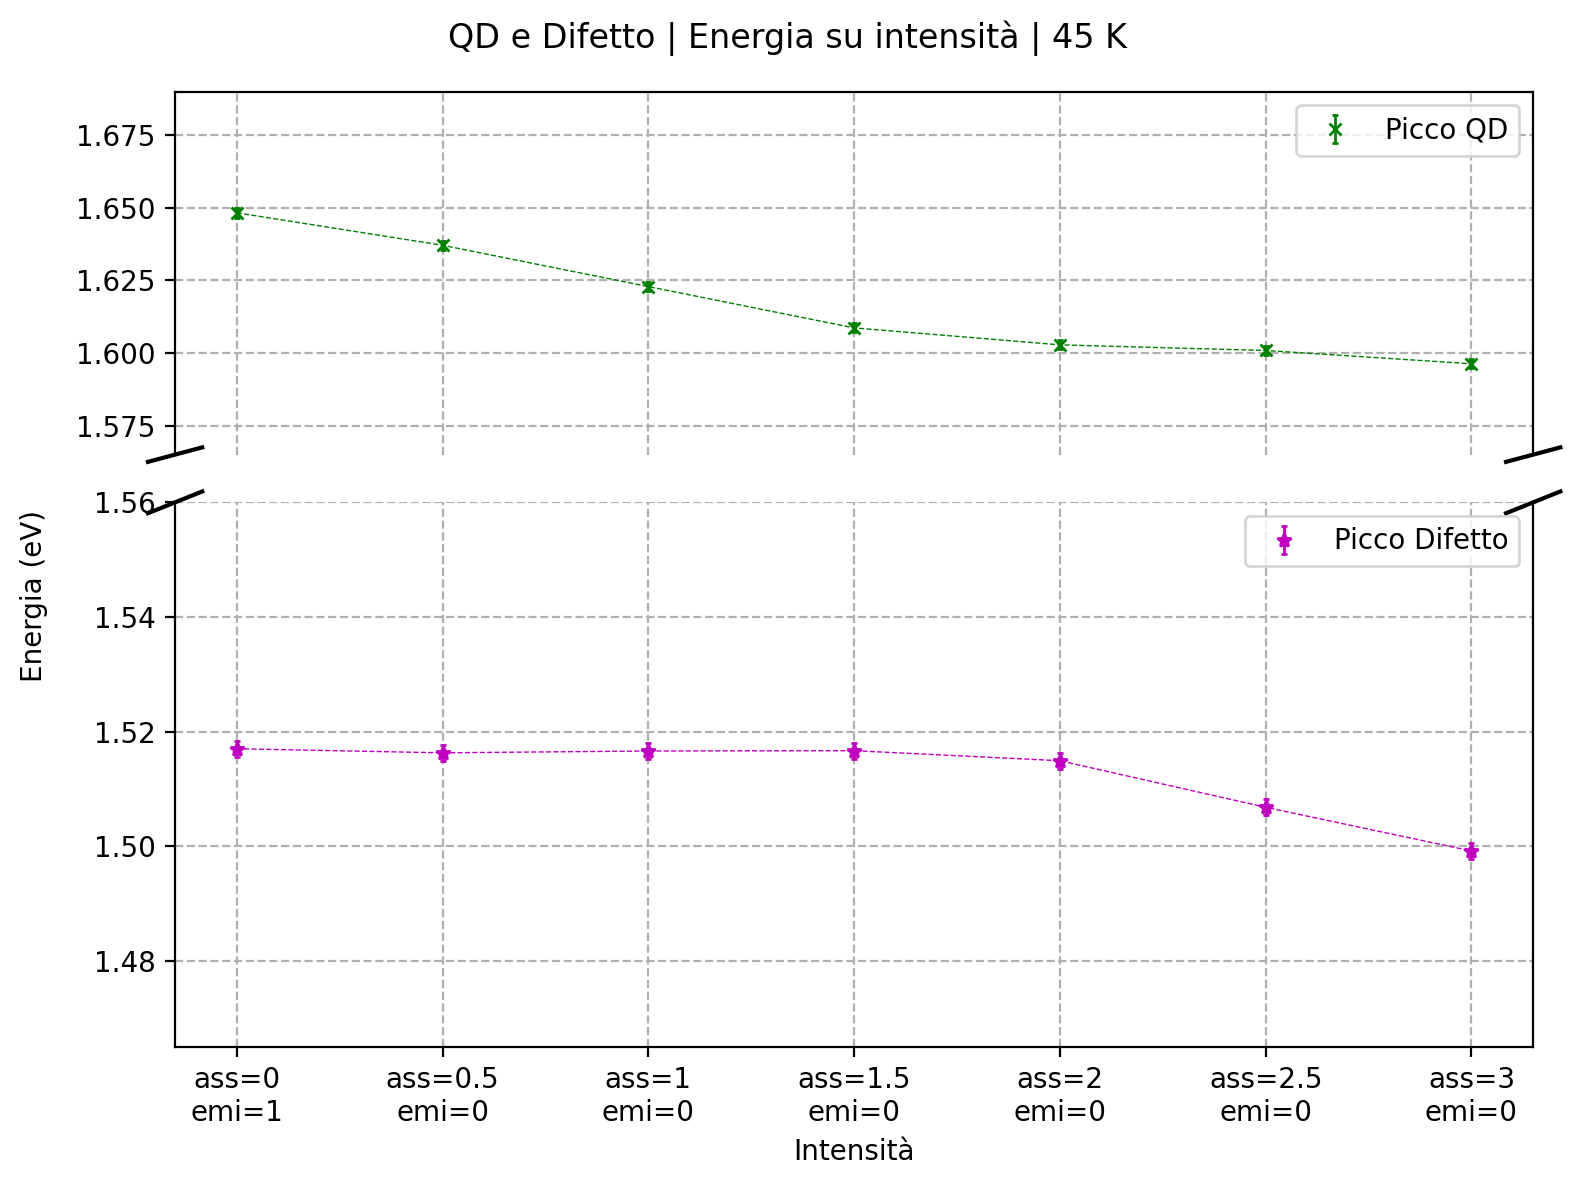

picco QD:
[np.float64(1.6482490683402153), np.float64(1.637066261972727), np.float64(1.6228428431638842), np.float64(1.6086289127179738), np.float64(1.602791141225743), np.float64(1.6008481702524238), np.float64(1.596272813192639)]
errore picco QD:
[np.float64(0.0016452002511896742), np.float64(0.0016229517399943038), np.float64(0.0015948726791274194), np.float64(0.0015670571299019461), np.float64(0.0015557039558559773), np.float64(0.0015519344622058867), np.float64(0.001543076024160602)]
picco Difetto:
[np.float64(1.5170247159697323), np.float64(1.51631672086188), np.float64(1.5166317539256902), np.float64(1.5166853919614447), np.float64(1.5149380574064133), np.float64(1.5068128943055001), np.float64(1.4991969030943257)]
errore picco Difetto:
[np.float64(0.0013936650285557059), np.float64(0.0013923644857713898), np.float64(0.0013929431068606614), np.float64(0.001393041635792524), np.float64(0.001389833709268261), np.float64(0.0013749653226838615), np.float64(0.0013611012790925657)]


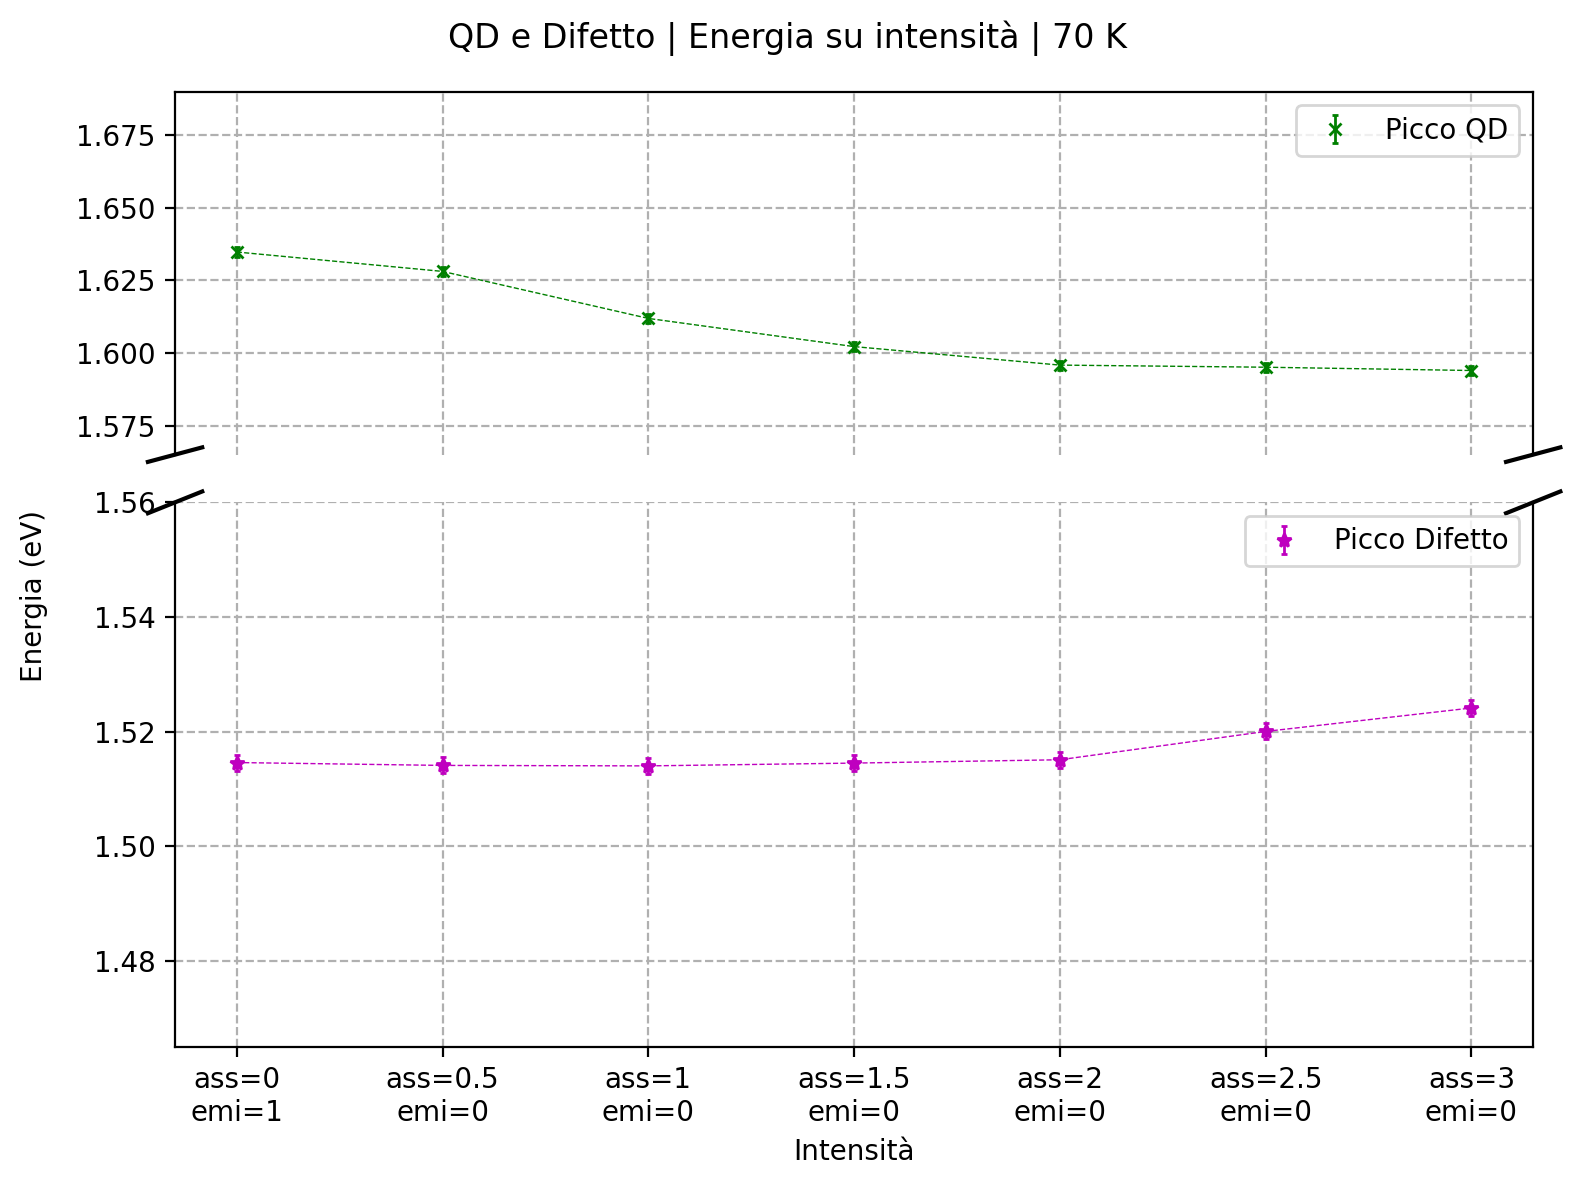

picco QD:
[np.float64(1.6347482001046723), np.float64(1.6280718068998041), np.float64(1.6118858020883122), np.float64(1.6021849825998795), np.float64(1.5958184338748342), np.float64(1.5950890803719397), np.float64(1.593957421523831)]
errore picco QD:
[np.float64(0.0016183588422131558), np.float64(0.0016051669190711973), np.float64(0.0015734089967250993), np.float64(0.001554527476861379), np.float64(0.0015421976755032585), np.float64(0.001540788304347084), np.float64(0.0015386028111209979)]
picco Difetto:
[np.float64(1.51461970416632), np.float64(1.5141191556280469), np.float64(1.5140367744693382), np.float64(1.51452429444371), np.float64(1.5151057856305854), np.float64(1.520045258565311), np.float64(1.5241371385616869)]
errore picco Difetto:
[np.float64(0.001389249643705055), np.float64(0.0013883315624579967), np.float64(0.0013881804921133153), np.float64(0.0013890746245262958), np.float64(0.001390141480590765), np.float64(0.0013992203968008494), np.float64(0.0014067637883026778)]


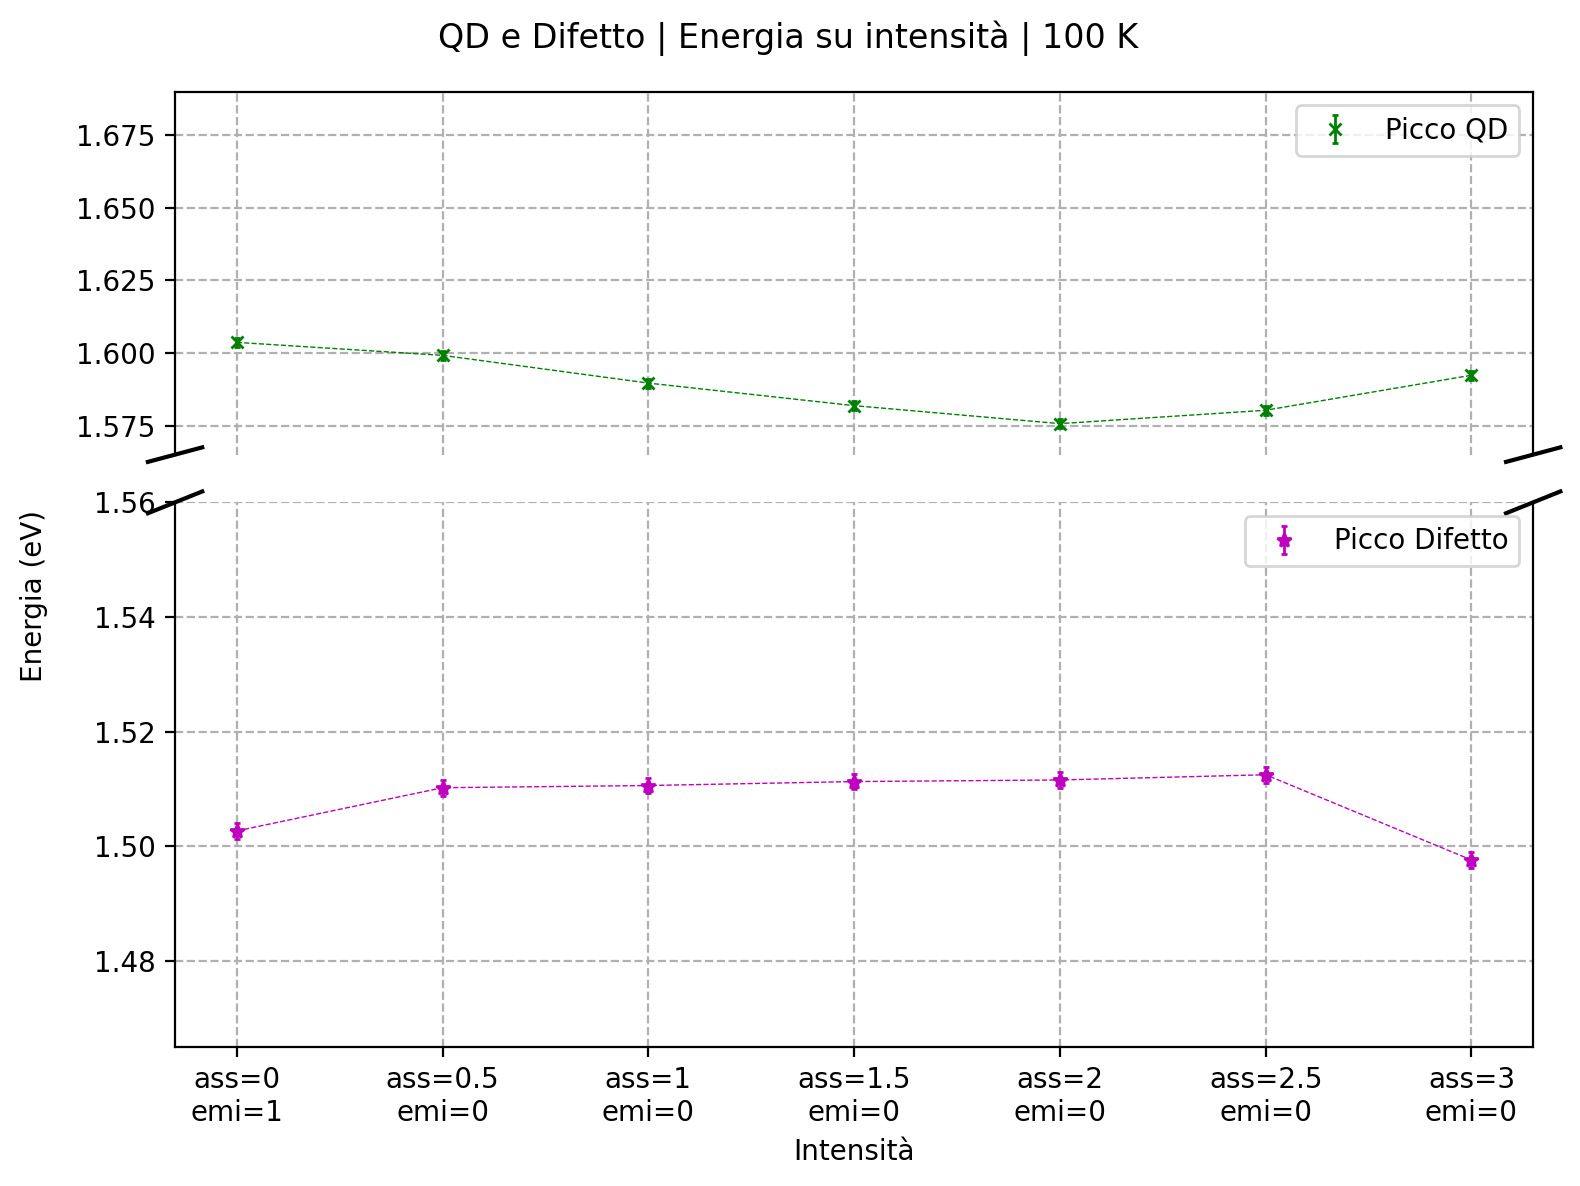

picco QD:
[np.float64(1.6036396297039093), np.float64(1.5991746134822349), np.float64(1.5896249215046963), np.float64(1.5818578638606842), np.float64(1.5756705078621278), np.float64(1.58028059354238), np.float64(1.5923263183913086)]
errore picco QD:
[np.float64(0.0015573515145917247), np.float64(0.0015486913153951619), np.float64(0.00153025009445436), np.float64(0.0015153327342705037), np.float64(0.0015035016252755902), np.float64(0.001512312364590303), np.float64(0.00153545550520312)]
picco Difetto:
[np.float64(1.5026980797753149), np.float64(1.510228331315522), np.float64(1.5106115838602332), np.float64(1.5113030529541425), np.float64(1.5115803730423238), np.float64(1.5124906353789023), np.float64(1.4976255321700598)]
errore picco Difetto:
[np.float64(0.0013674660475844148), np.float64(0.001381205552927206), np.float64(0.0013819066624202905), np.float64(0.001383172063075562), np.float64(0.0013836797264337947), np.float64(0.0013853467112630755), np.float64(0.0013582495201403702)]


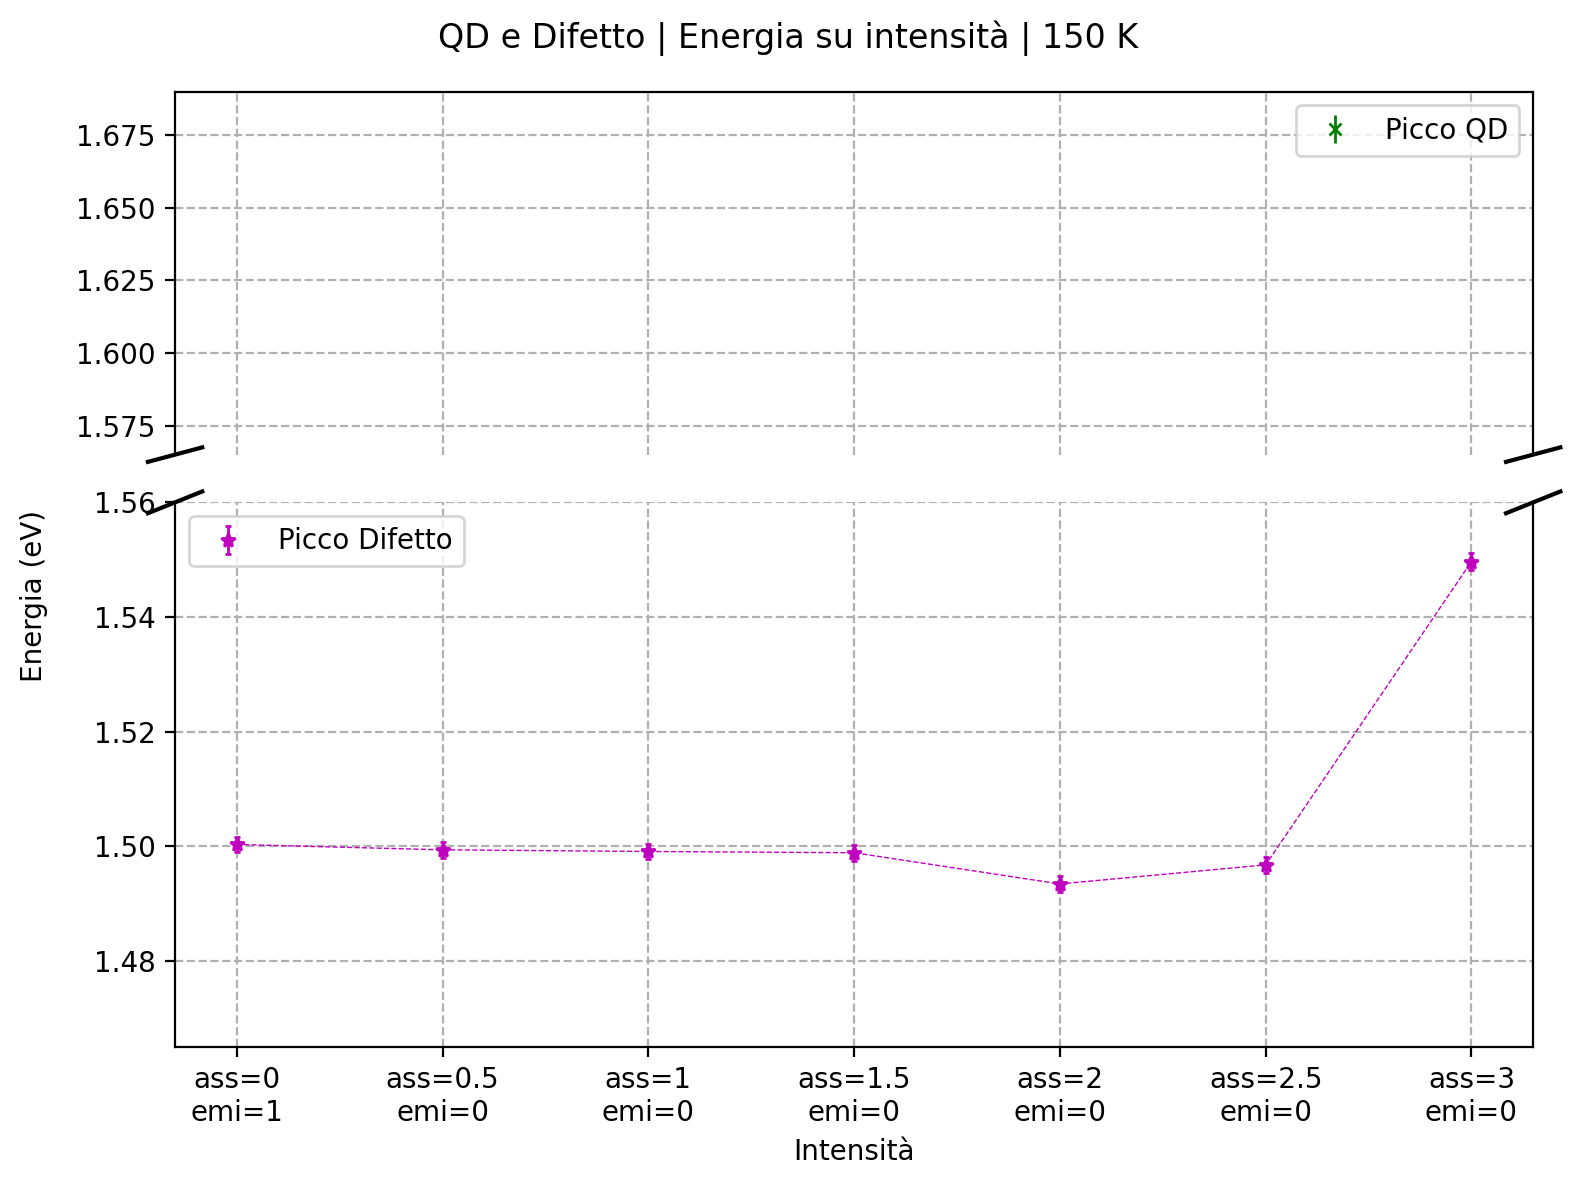

picco QD:
[]
errore picco QD:
[]
picco Difetto:
[np.float64(1.5003287145410062), np.float64(1.4993982585527608), np.float64(1.4991095545014133), np.float64(1.498886668157599), np.float64(1.493448019634041), np.float64(1.4967757575944973), np.float64(1.5496766354521285)]
errore picco Difetto:
[np.float64(0.0013631571684889151), np.float64(0.001361466919624714), np.float64(0.0013609426784206896), np.float64(0.0013605380208865055), np.float64(0.0013506826210266097), np.float64(0.0013567085762554497), np.float64(0.001454304204488276)]


In [130]:
for i, temp in enumerate(arr_temperatura):
    temp = str(temp)
    
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []

    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x2.append(i)
            x4.append(i)
        
            # picco sx 2
            y2.append(medie[temp][ass][emi][0])
            err_y2.append(medie[temp][ass][emi][1])
            
            # picco dx 2
            y4.append(medie[temp][ass][emi][2])
            err_y4.append(medie[temp][ass][emi][3])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]
    err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]

    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    err_y4 = [e_y_val for e_y_val in err_y4 if e_y_val != 0]
    
    # DOPO I 30K I DIFETTI SCOMPAIONO, NON C'È BISOGNO DI DUE GRAFICI
    if len(y4) < 2:
        plt.figure(figsize=(9, 6), dpi=300)
        plt.errorbar(x2, y2, yerr=err_y2, fmt='gx', label='Picco QD', markersize=4, elinewidth=0.8, capsize=1.5)
        plt.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
        
        # Aggiungere etichette e legenda
        plt.title('QD | Energia su intensità | ' + temp + ' K')
        plt.xlabel('Intensità')
        plt.xticks(range(1, 8), etichette_x)
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.show()

    else:
        # Creazione della figura
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 6]}, figsize=(8, 6), dpi=200)

        # Plot superiore (range > 1.59)
        ax1.errorbar(x2, y2, yerr=err_y2, fmt='gx', label='Picco QD', markersize=4, elinewidth=1, capsize=1)
        ax1.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
        ax1.errorbar(x4, y4, yerr=err_y4, fmt='m*', markersize=4, elinewidth=1, capsize=1)
        
        ax1.set_ylim(1.565, 1.690)  # Intervallo superiore
        ax1.spines['bottom'].set_visible(False)
        ax1.tick_params(bottom=False)
        ax1.grid(linestyle='--')

        # Plot inferiore (range < 1.54)
        ax2.errorbar(x2, y2, yerr=err_y2, fmt='gx', markersize=4, elinewidth=1, capsize=1)
        ax2.errorbar(x4, y4, yerr=err_y4, fmt='m*', label='Picco Difetto', markersize=5, elinewidth=1, capsize=1)
        ax2.plot(x4, y4, linestyle='--', color='m', linewidth=0.5) # unisce i punti
        ax2.set_ylim(1.465, 1.56)  # Intervallo inferiore
        ax2.spines['top'].set_visible(False)
        ax2.grid(linestyle='--')

        # Aggiunta della "scaletta" per indicare il break
        d = 0.02  # Distanza delle linee spezzate
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)  # Linea spezzata in alto
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Linea spezzata in basso
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

        # Etichette e titolo
        ax2.set_xlabel('Intensità')
        ax2.set_xticks(range(1, 8))
        ax2.set_xticklabels(etichette_x)
        ax1.legend()
        ax2.legend()
        fig.supylabel('Energia (eV)', fontsize=10)
        fig.suptitle('QD e Difetto | Energia su intensità | ' + temp + ' K')

        # Mostrare il grafico
        plt.tight_layout()
        plt.show()

    # STAMPA DEI VALORI
    print ('picco QD:')
    print (y2)
    print ('errore picco QD:')
    print (err_y2)
    if len(y4) > 0:
        print ('picco Difetto:')
        print (y4)
        print ('errore picco Difetto:')
        print (err_y4)


## Plot FWHM su Intensità

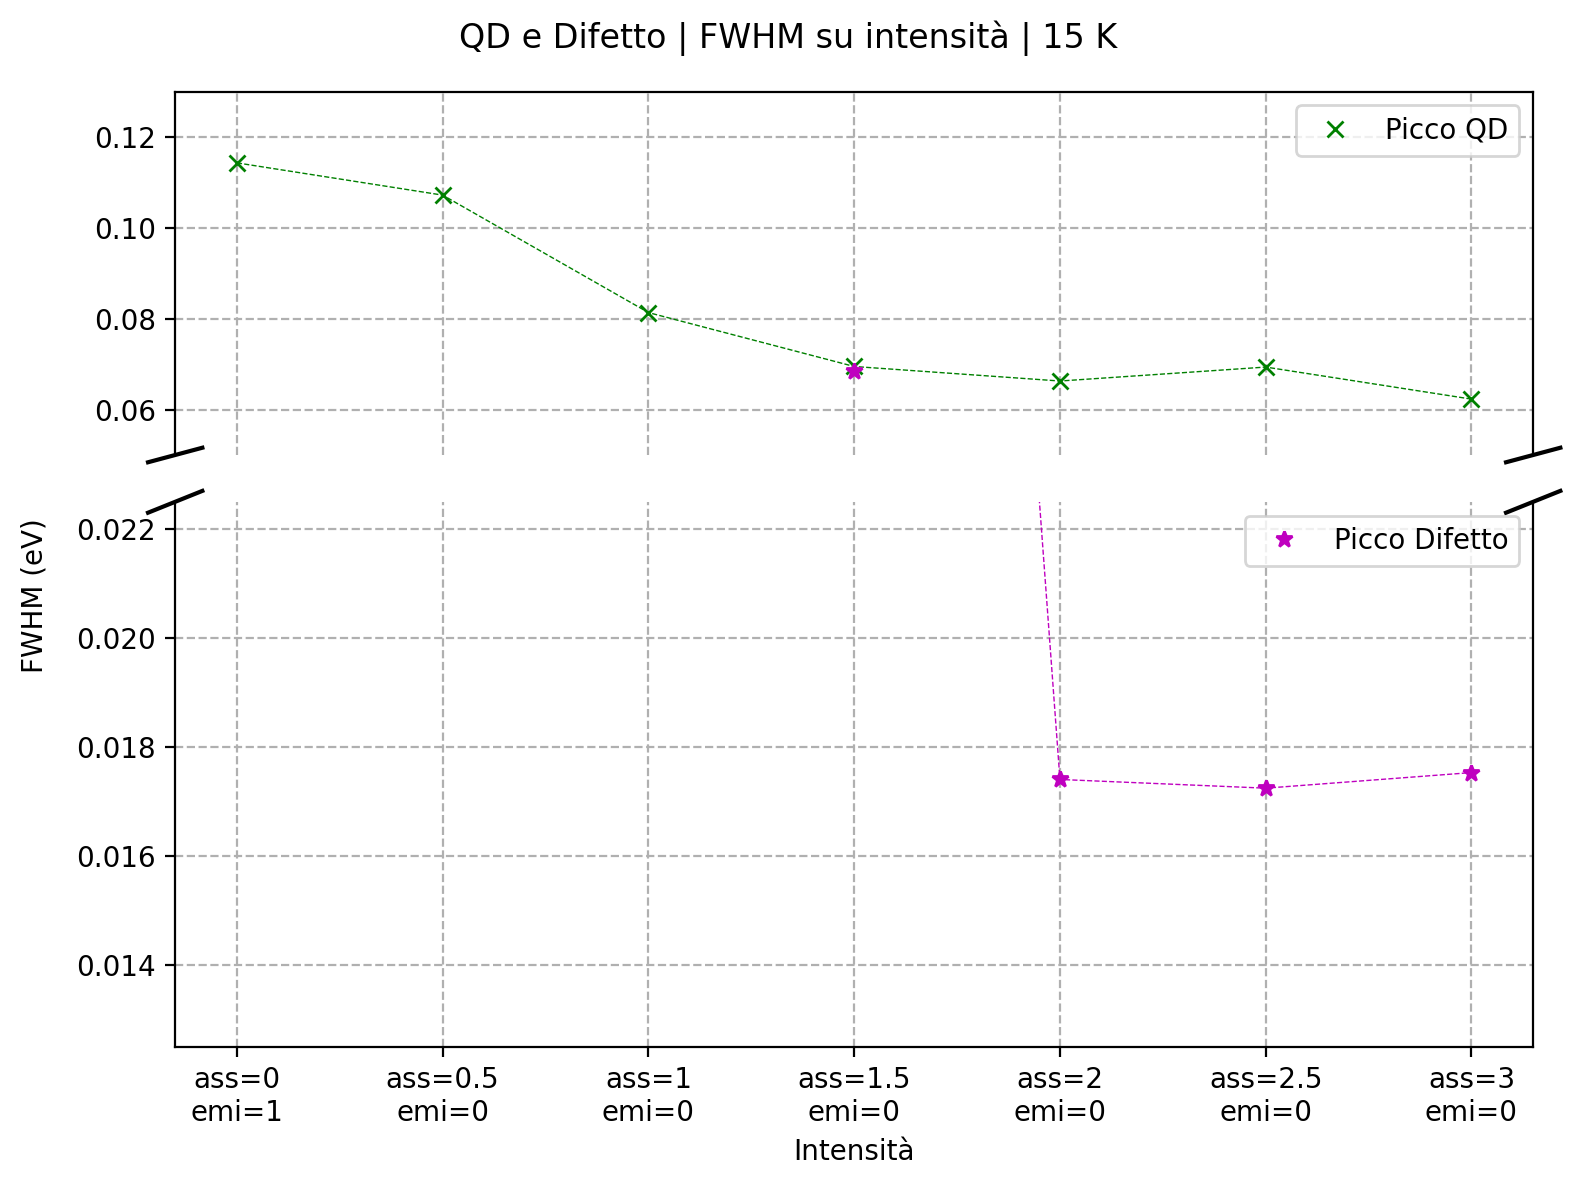

fwhm picco QD:
[np.float64(0.11429355717860729), np.float64(0.10719397000066705), np.float64(0.08134485688673823), np.float64(0.0694793410598426), np.float64(0.06628175812308464), np.float64(0.06935339726530569), np.float64(0.06229898189213284)]
fwhm picco Difetto:
[np.float64(0.041634435567718314), np.float64(0.04087952992765462), np.float64(0.03821749404317833), np.float64(0.06848452995647915), np.float64(0.017407431849471345), np.float64(0.01724779802805404), np.float64(0.01753367634934032)]


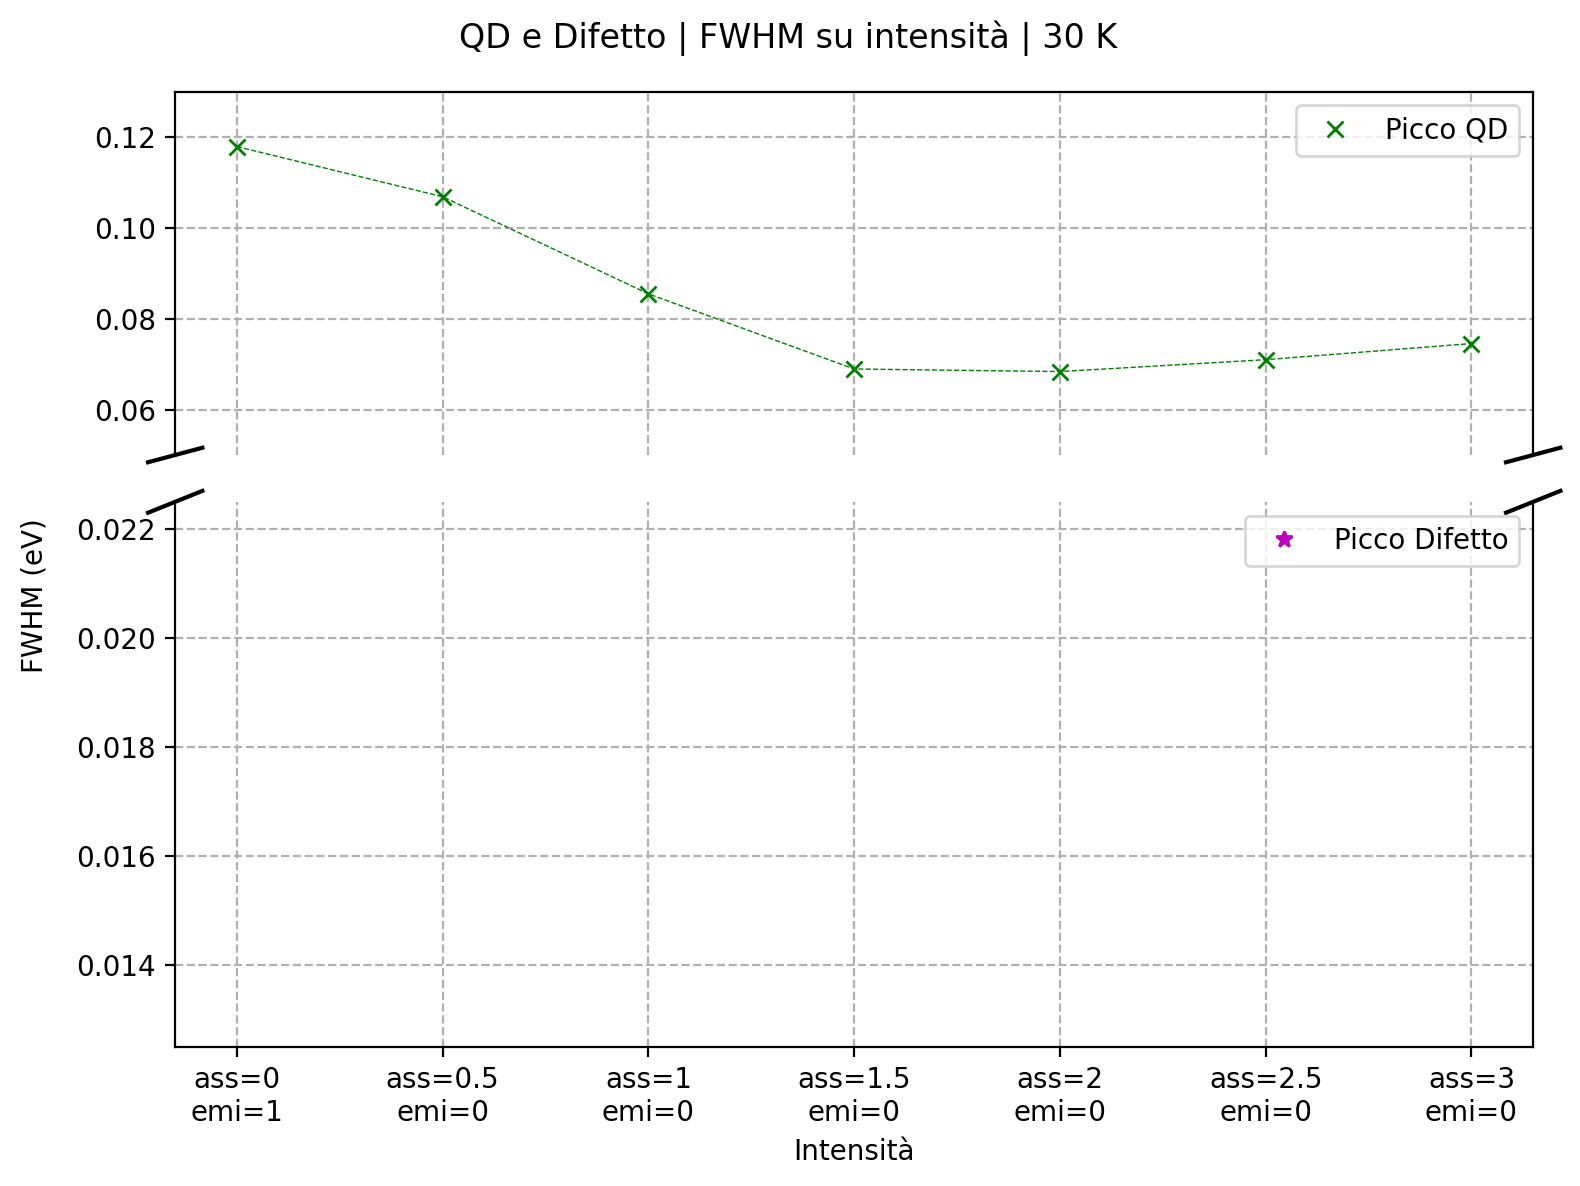

fwhm picco QD:
[np.float64(0.11788429741077228), np.float64(0.10682849346256362), np.float64(0.08546083030670022), np.float64(0.06892679716540541), np.float64(0.06836423786015736), np.float64(0.07097762998070374), np.float64(0.07452948780445763)]
fwhm picco Difetto:
[np.float64(0.0334258573351487), np.float64(0.0371692527355341), np.float64(0.04145309737964268), np.float64(0.045062304091819216), np.float64(0.04622788446179819), np.float64(0.0301372428954582), np.float64(0.03524177495564939)]


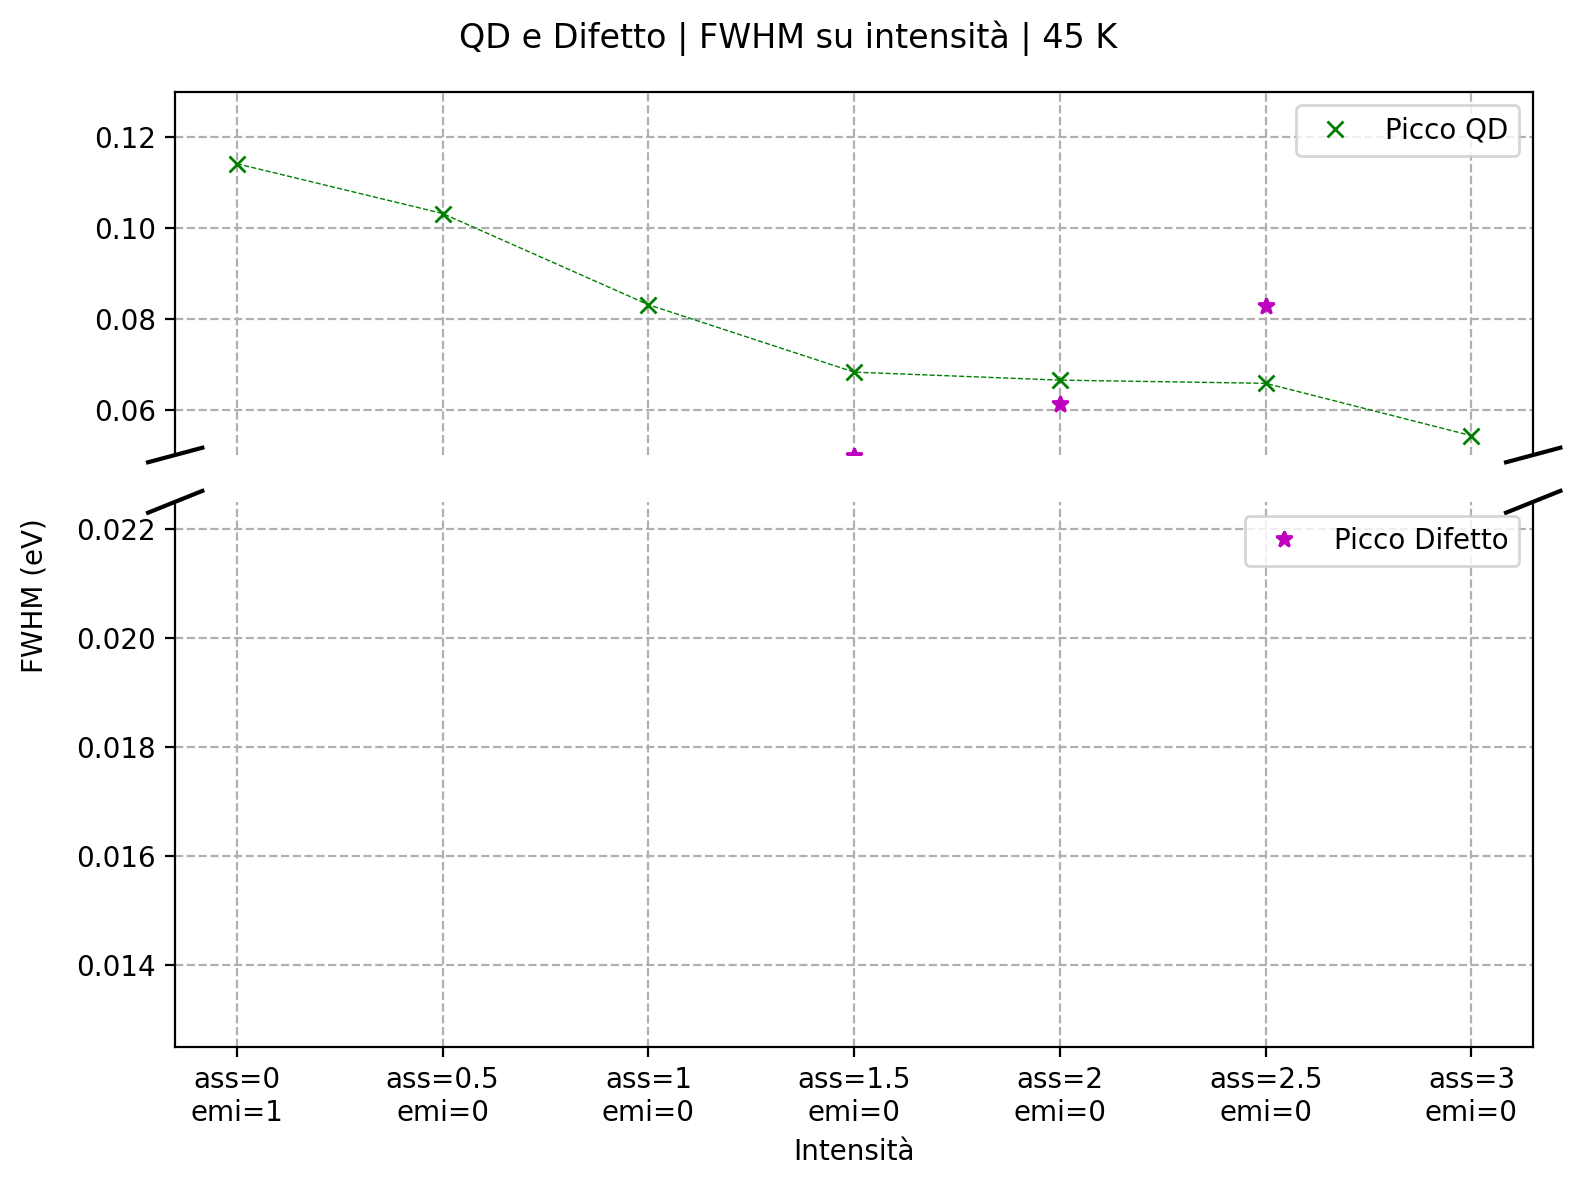

fwhm picco QD:
[np.float64(0.11409906744830321), np.float64(0.10314503928588548), np.float64(0.0830757269127158), np.float64(0.0682377266368752), np.float64(0.06647809901878328), np.float64(0.06577867327798904), np.float64(0.05424812926388026)]
fwhm picco Difetto:
[np.float64(0.03269483662062646), np.float64(0.033239952015658755), np.float64(0.0377635848842524), np.float64(0.04982045267917676), np.float64(0.061150154640172226), np.float64(0.0827833563986356), np.float64(0.042794069880543746)]


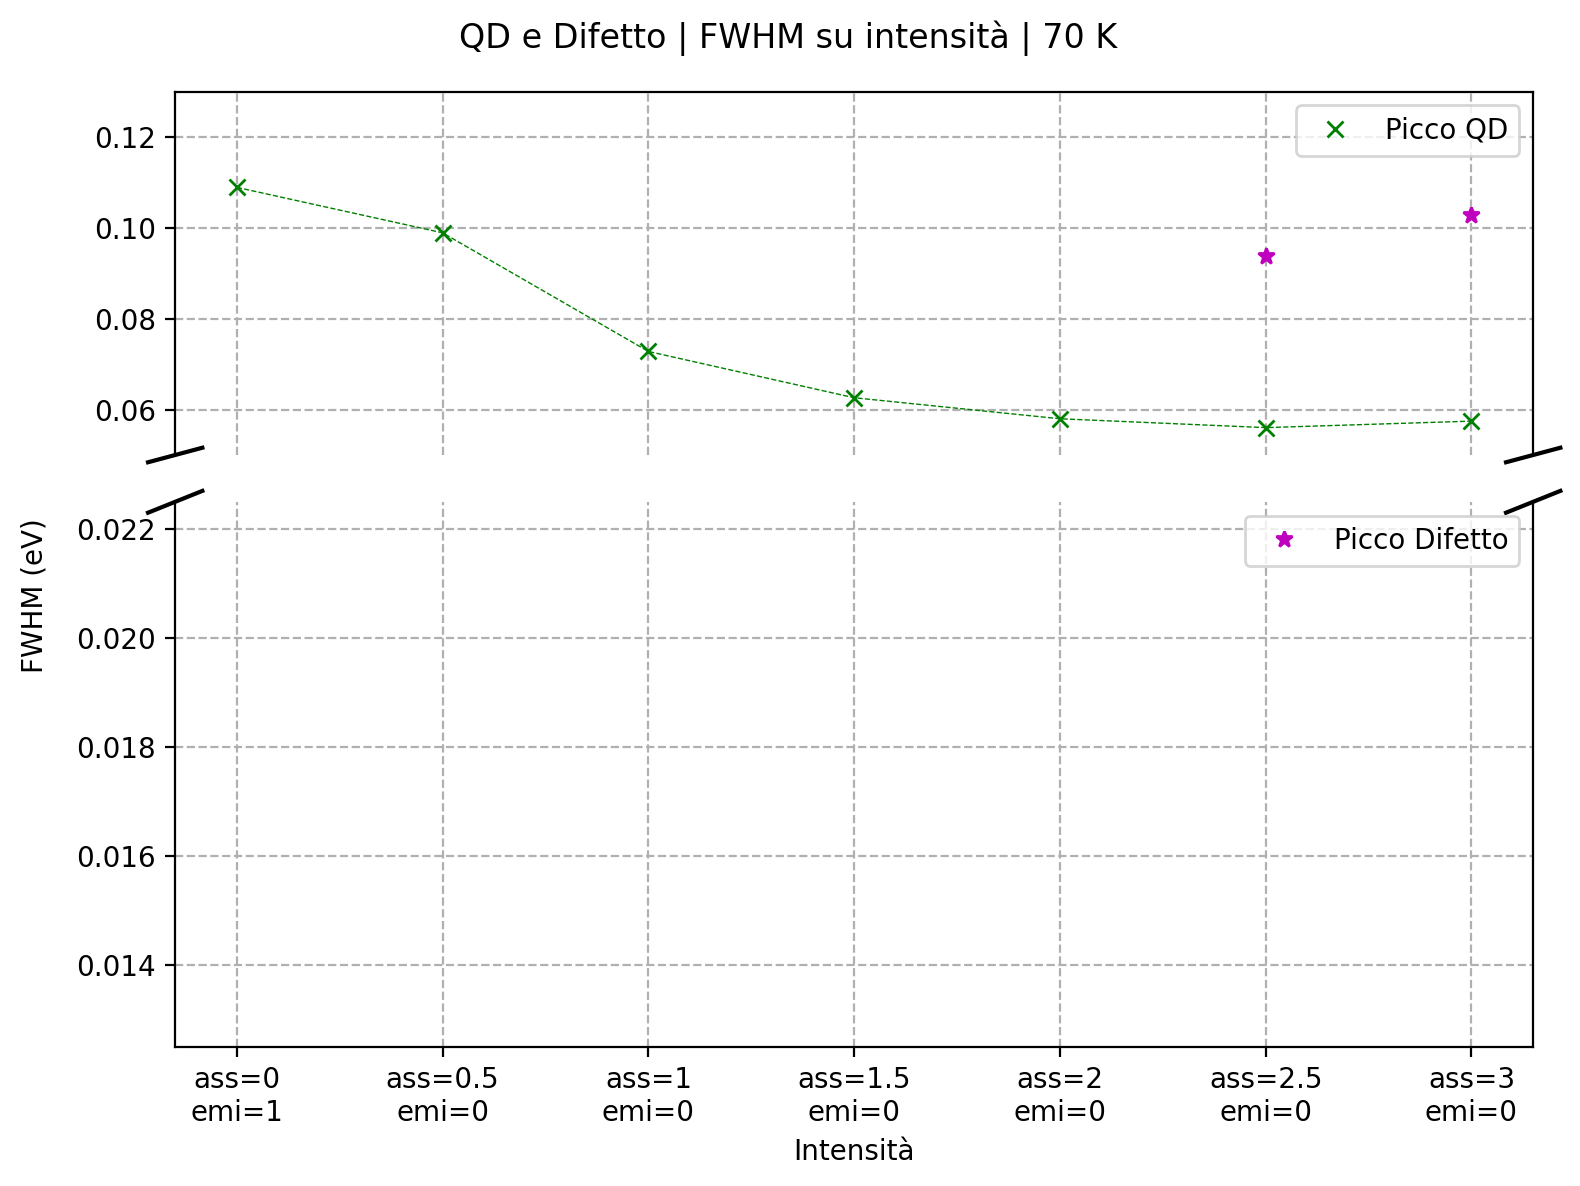

fwhm picco QD:
[np.float64(0.10889787531868582), np.float64(0.09889562007112015), np.float64(0.07278394095849199), np.float64(0.06260029561336478), np.float64(0.057974617252347586), np.float64(0.05602201283078248), np.float64(0.05745435401899482)]
fwhm picco Difetto:
[np.float64(0.03513790085800624), np.float64(0.031287131616620674), np.float64(0.030297490326527718), np.float64(0.030166899222811055), np.float64(0.029488171573263368), np.float64(0.09375881394566002), np.float64(0.10284509907529694)]


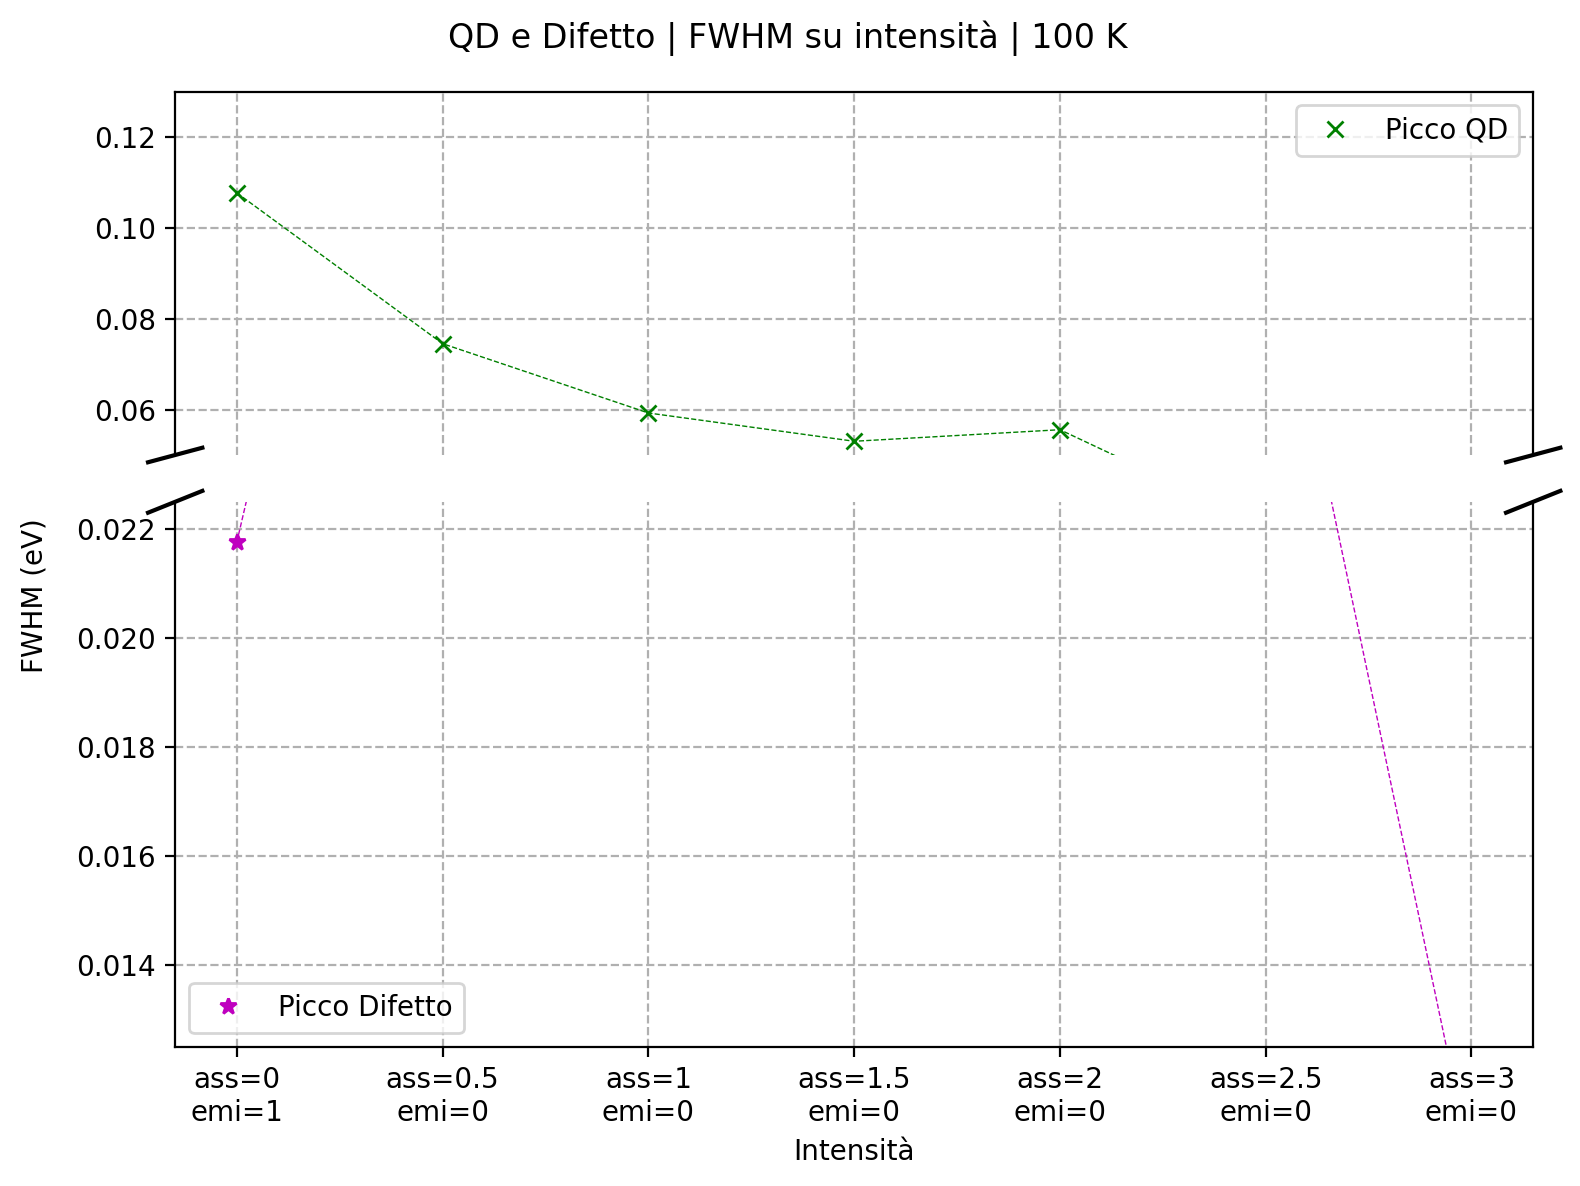

fwhm picco QD:
[np.float64(0.10766952107899525), np.float64(0.07449393378792854), np.float64(0.05924395061555568), np.float64(0.05302187648333746), np.float64(0.055564197657346576), np.float64(0.034237063380868855), np.float64(0.03330469844320816)]
fwhm picco Difetto:
[np.float64(0.02176823694587869), np.float64(0.03793248972788473), np.float64(0.03519220938250116), np.float64(0.03358539940364133), np.float64(0.03300858935859636), np.float64(0.028224824699969907), np.float64(0.010326501076309433)]


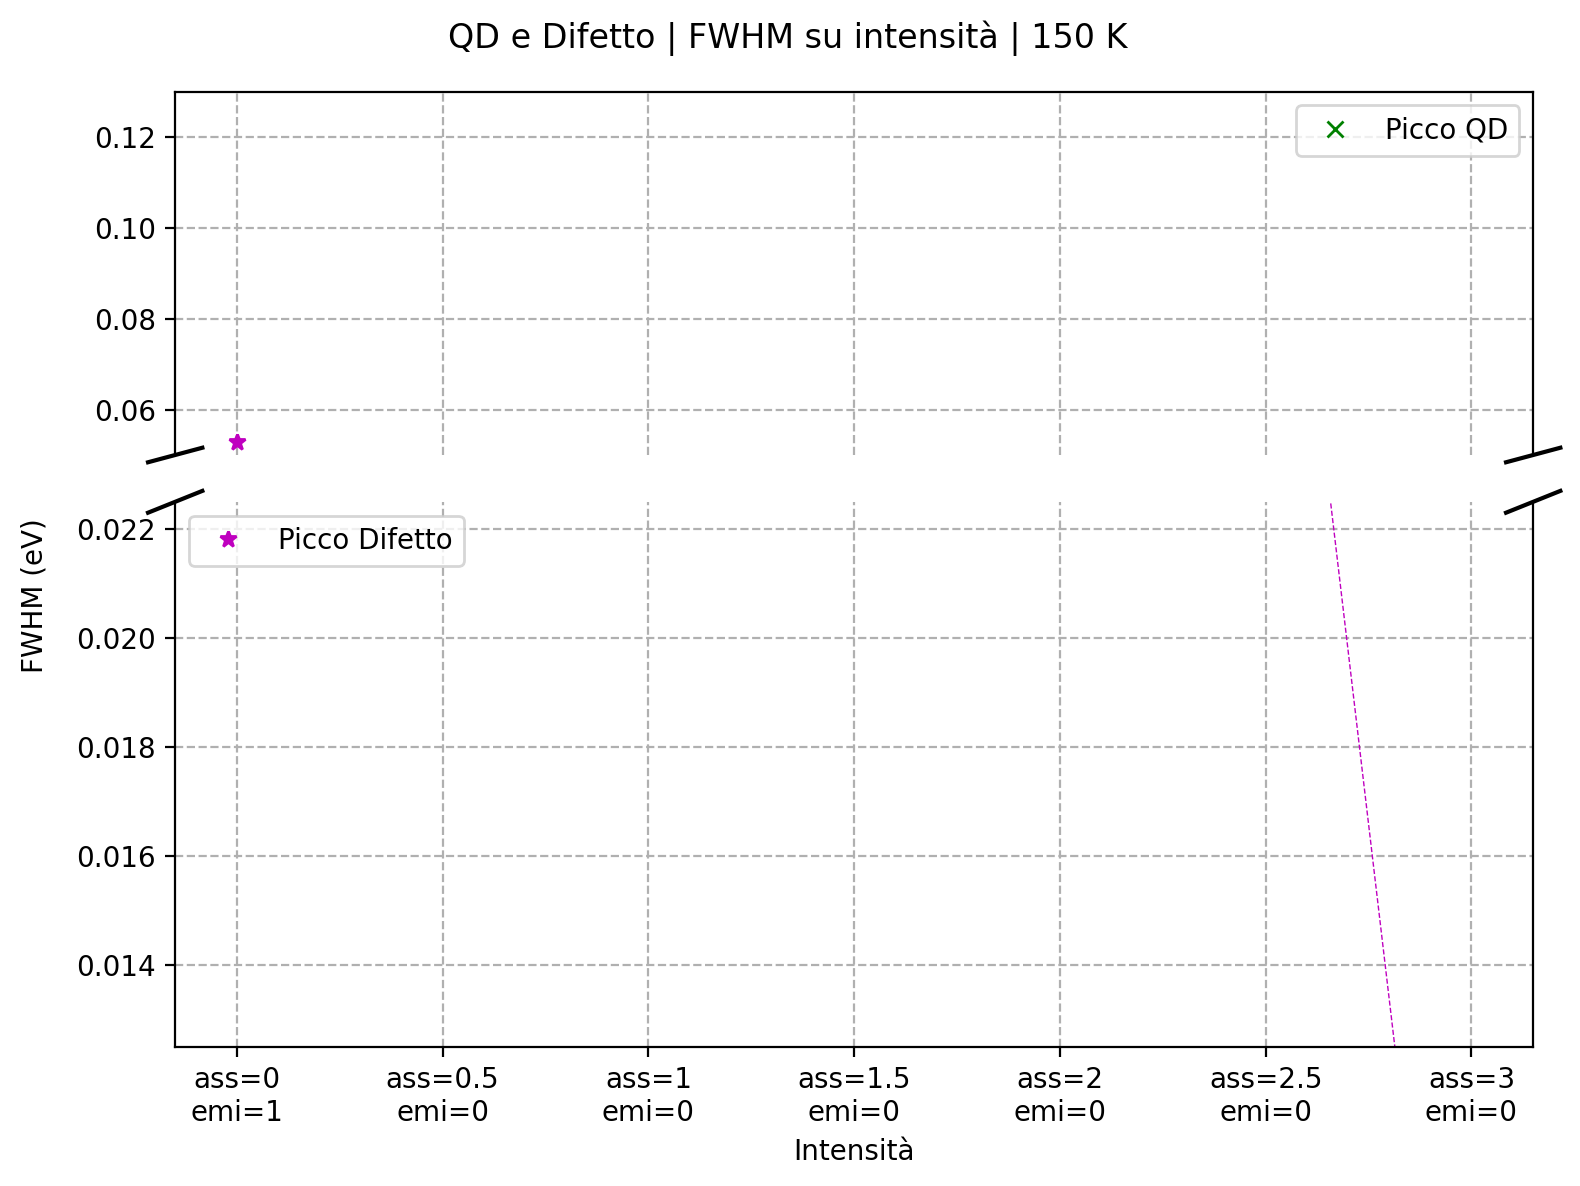

fwhm picco QD:
[]
fwhm picco Difetto:
[np.float64(0.05280459223660674), np.float64(0.04676540648836484), np.float64(0.04401424421768097), np.float64(0.04125592460516561), np.float64(0.028129133911439258), np.float64(0.03257710823661268), np.float64(0.0005920145381867312)]


In [127]:
for i, temp in enumerate(arr_temperatura):
    temp = str(temp)
    
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []

    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x2.append(i)
            x4.append(i)
        
            # fwhm picco sx 2
            y2.append(fwhm[temp][ass][emi][0])
            # fwhm dx 2
            y4.append(fwhm[temp][ass][emi][1])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]

    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    
    # DOPO I 30K I DIFETTI SCOMPAIONO, NON C'È BISOGNO DI DUE GRAFICI
    if len(y4) < 2:
        plt.figure(figsize=(8, 6))
        plt.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco QD', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
        
        # Aggiungere etichette e legenda
        plt.title('QD | FWHM su intensità | ' + temp + ' K')
        plt.xlabel('Intensità')
        plt.xticks(range(1, 8), etichette_x)
        plt.ylabel('FWHM (eV)')
        
        plt.grid(linestyle='--')
        plt.legend()

        # Mostrare il grafico
        plt.tight_layout()
        plt.show()

    else:
        # Creazione della figura
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 6]}, figsize=(8, 6), dpi=200)

        # Plot superiore (range > 1.59)
        ax1.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco QD', markersize=6, elinewidth=0, capsize=0)
        ax1.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
        ax1.errorbar(x4, y4, yerr=0, fmt='m*', markersize=6, elinewidth=0, capsize=0)
        
        ax1.set_ylim(0.05, 0.13)  # Intervallo superiore
        ax1.spines['bottom'].set_visible(False)
        ax1.tick_params(bottom=False)
        ax1.grid(linestyle='--')

        # Plot inferiore (range < 1.54)
        ax2.errorbar(x2, y2, yerr=0, fmt='gx', markersize=6, elinewidth=0, capsize=0)
        ax2.errorbar(x4, y4, yerr=0, fmt='m*', label='Picco Difetto', markersize=6, elinewidth=0, capsize=0)
        ax2.plot(x4, y4, linestyle='--', color='m', linewidth=0.5) # unisce i punti
        ax2.set_ylim(0.0125, 0.0225)  # Intervallo inferiore
        ax2.spines['top'].set_visible(False)
        ax2.grid(linestyle='--')

        # Aggiunta della "scaletta" per indicare il break
        d = 0.02  # Distanza delle linee spezzate
        kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
        ax1.plot((-d, +d), (-d, +d), **kwargs)  # Linea spezzata in alto
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Linea spezzata in basso
        ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

        # Etichette e titolo
        ax2.set_xlabel('Intensità')
        ax2.set_xticks(range(1, 8))
        ax2.set_xticklabels(etichette_x)
        ax1.legend()
        ax2.legend()
        fig.supylabel('FWHM (eV)', fontsize=10)
        fig.suptitle('QD e Difetto | FWHM su intensità | ' + temp + ' K')

        # Mostrare il grafico
        plt.tight_layout()
        plt.show()

    # STAMPA DEI VALORI
    print ('fwhm picco QD:')
    print (y2)
    if len(y4) > 0:
        print ('fwhm picco Difetto:')
        print (y4)


## Plot AREA PICCO su Intensità

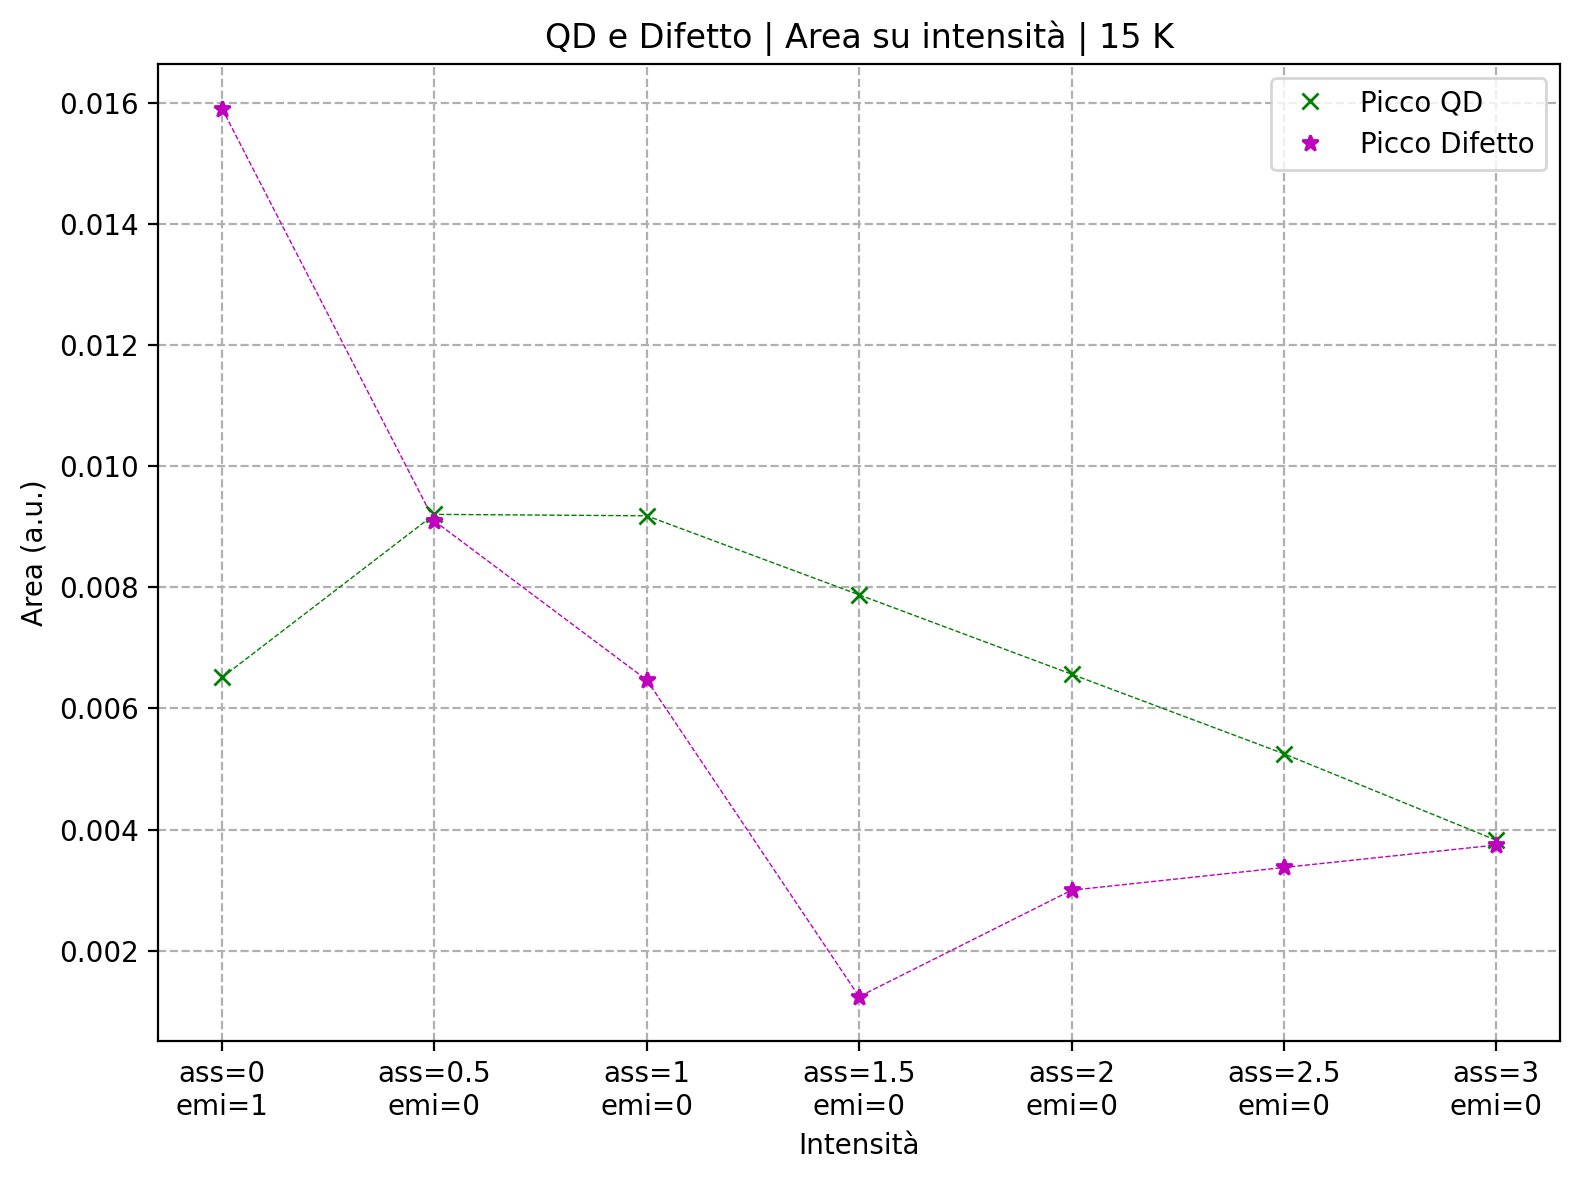

area picco QD:
[np.float64(0.006512147582217992), np.float64(0.00920357570084096), np.float64(0.009179989888438158), np.float64(0.007875551585569938), np.float64(0.006566490293823453), np.float64(0.005252425524731693), np.float64(0.003825162981314697)]
area picco Difetto:
[np.float64(0.015900643714351598), np.float64(0.00909398196819574), np.float64(0.006470582052633842), np.float64(0.0012441876310795325), np.float64(0.0030006878563110548), np.float64(0.0033755705125503967), np.float64(0.0037467601727751007)]


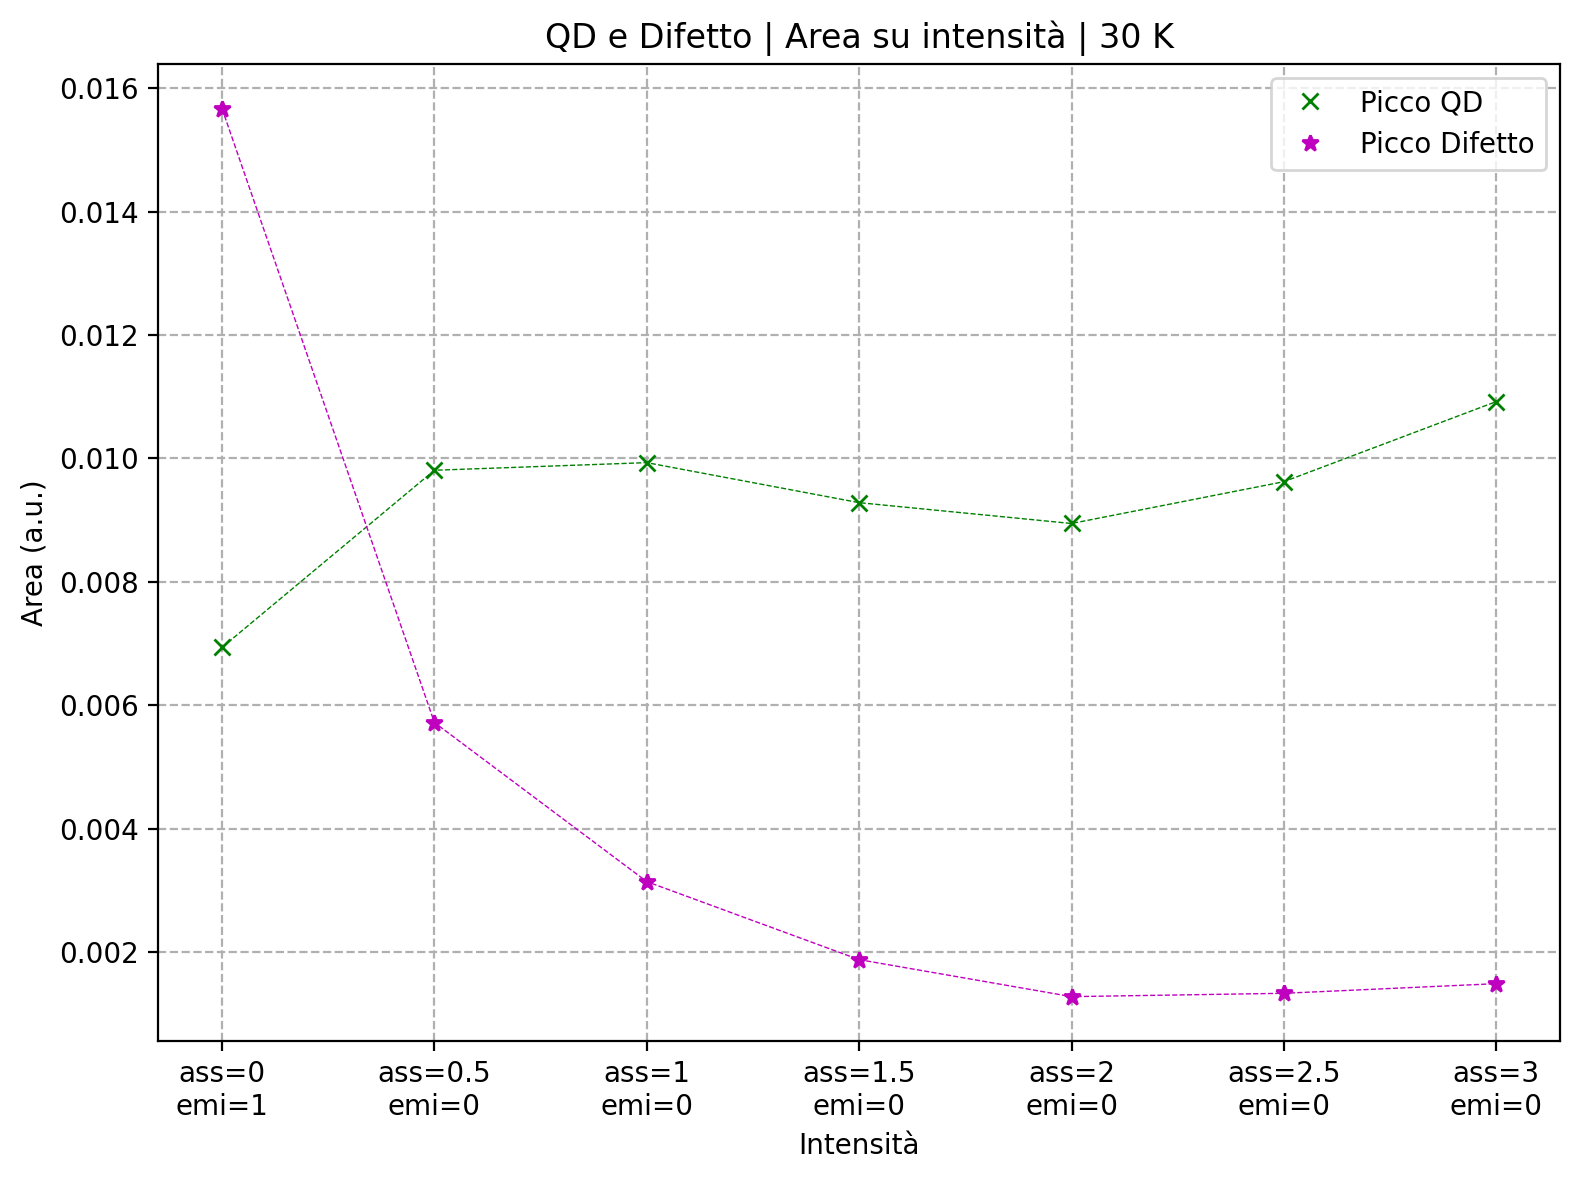

area picco QD:
[np.float64(0.006937047125295126), np.float64(0.009807816988174067), np.float64(0.00993139362787262), np.float64(0.009282708139182574), np.float64(0.008945097344896458), np.float64(0.009622788792617054), np.float64(0.010921035263313303)]
area picco Difetto:
[np.float64(0.01566907027944797), np.float64(0.005720204195800689), np.float64(0.003141865977638607), np.float64(0.0018774708282210384), np.float64(0.0012778013172136948), np.float64(0.001332003756711678), np.float64(0.001487875937342536)]


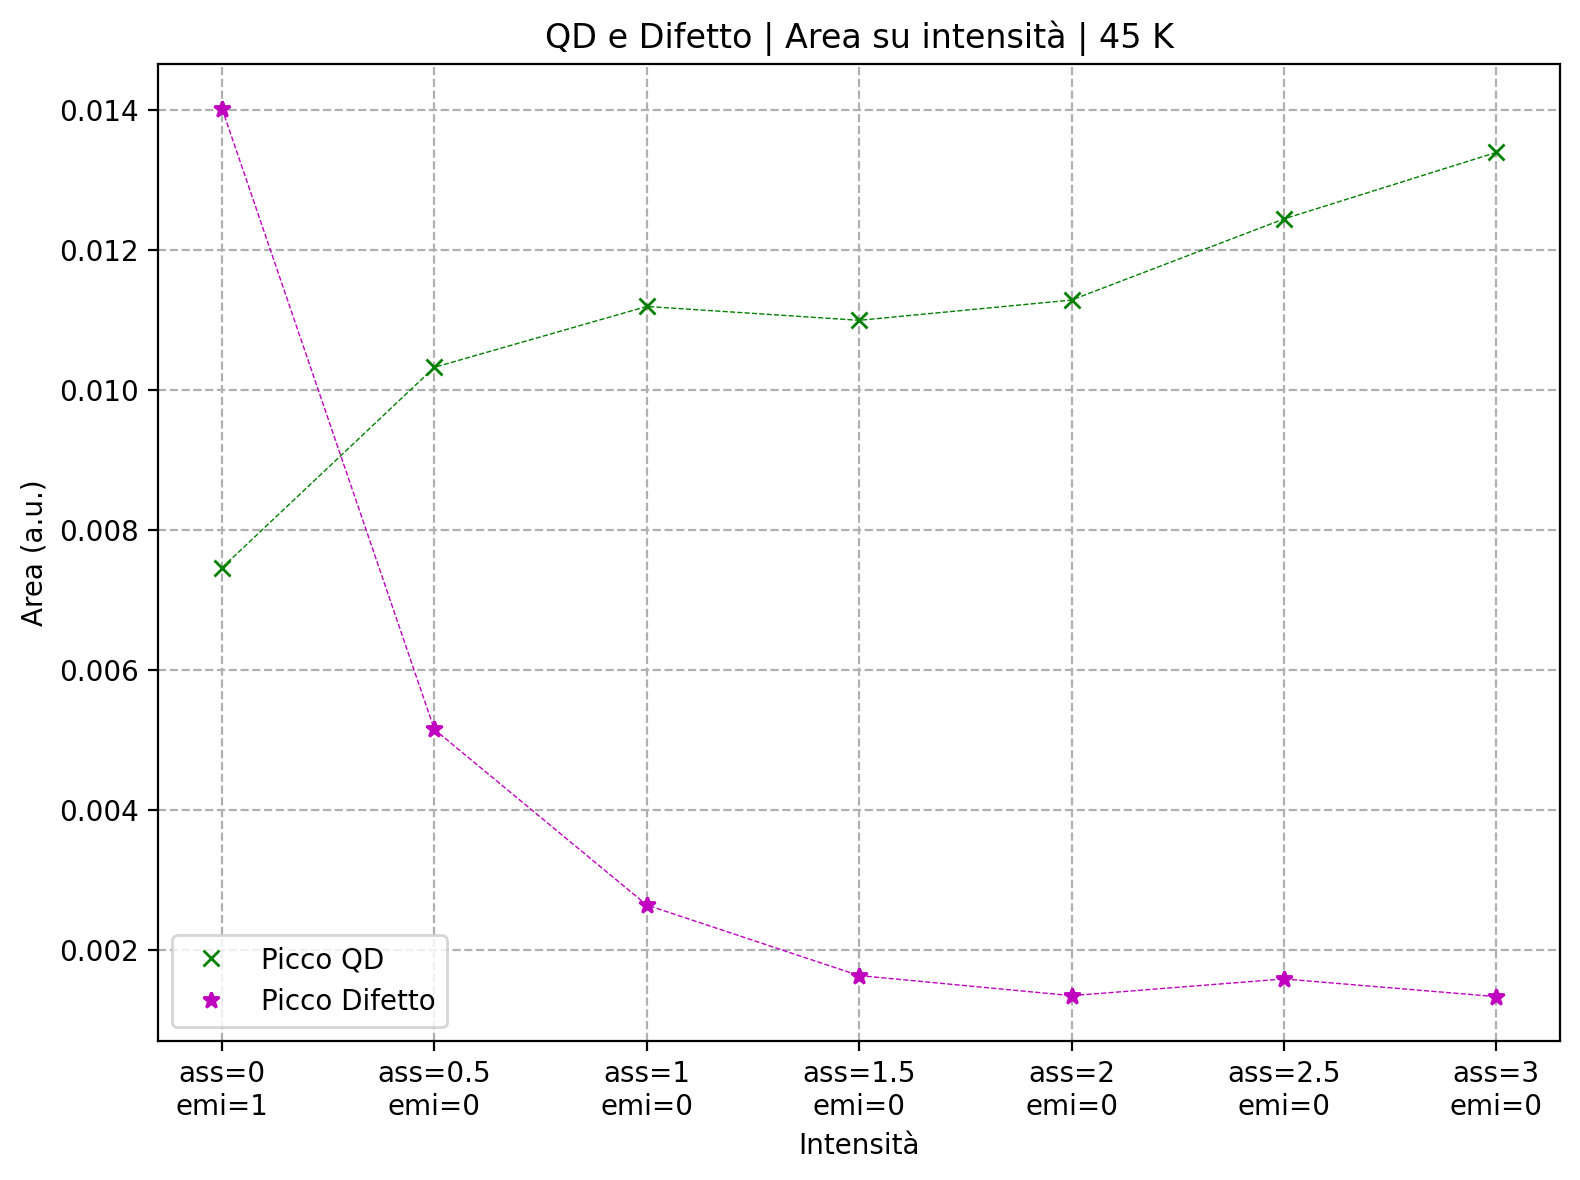

area picco QD:
[np.float64(0.007457418304338393), np.float64(0.010320356641513647), np.float64(0.01118945551646968), np.float64(0.010991619237532571), np.float64(0.011280809704794557), np.float64(0.012439352804752073), np.float64(0.013389539555155082)]
area picco Difetto:
[np.float64(0.014015632939227937), np.float64(0.005147995050392232), np.float64(0.0026402362535576473), np.float64(0.0016324472797699325), np.float64(0.0013459826282745232), np.float64(0.0015844714640085365), np.float64(0.0013319137076082406)]


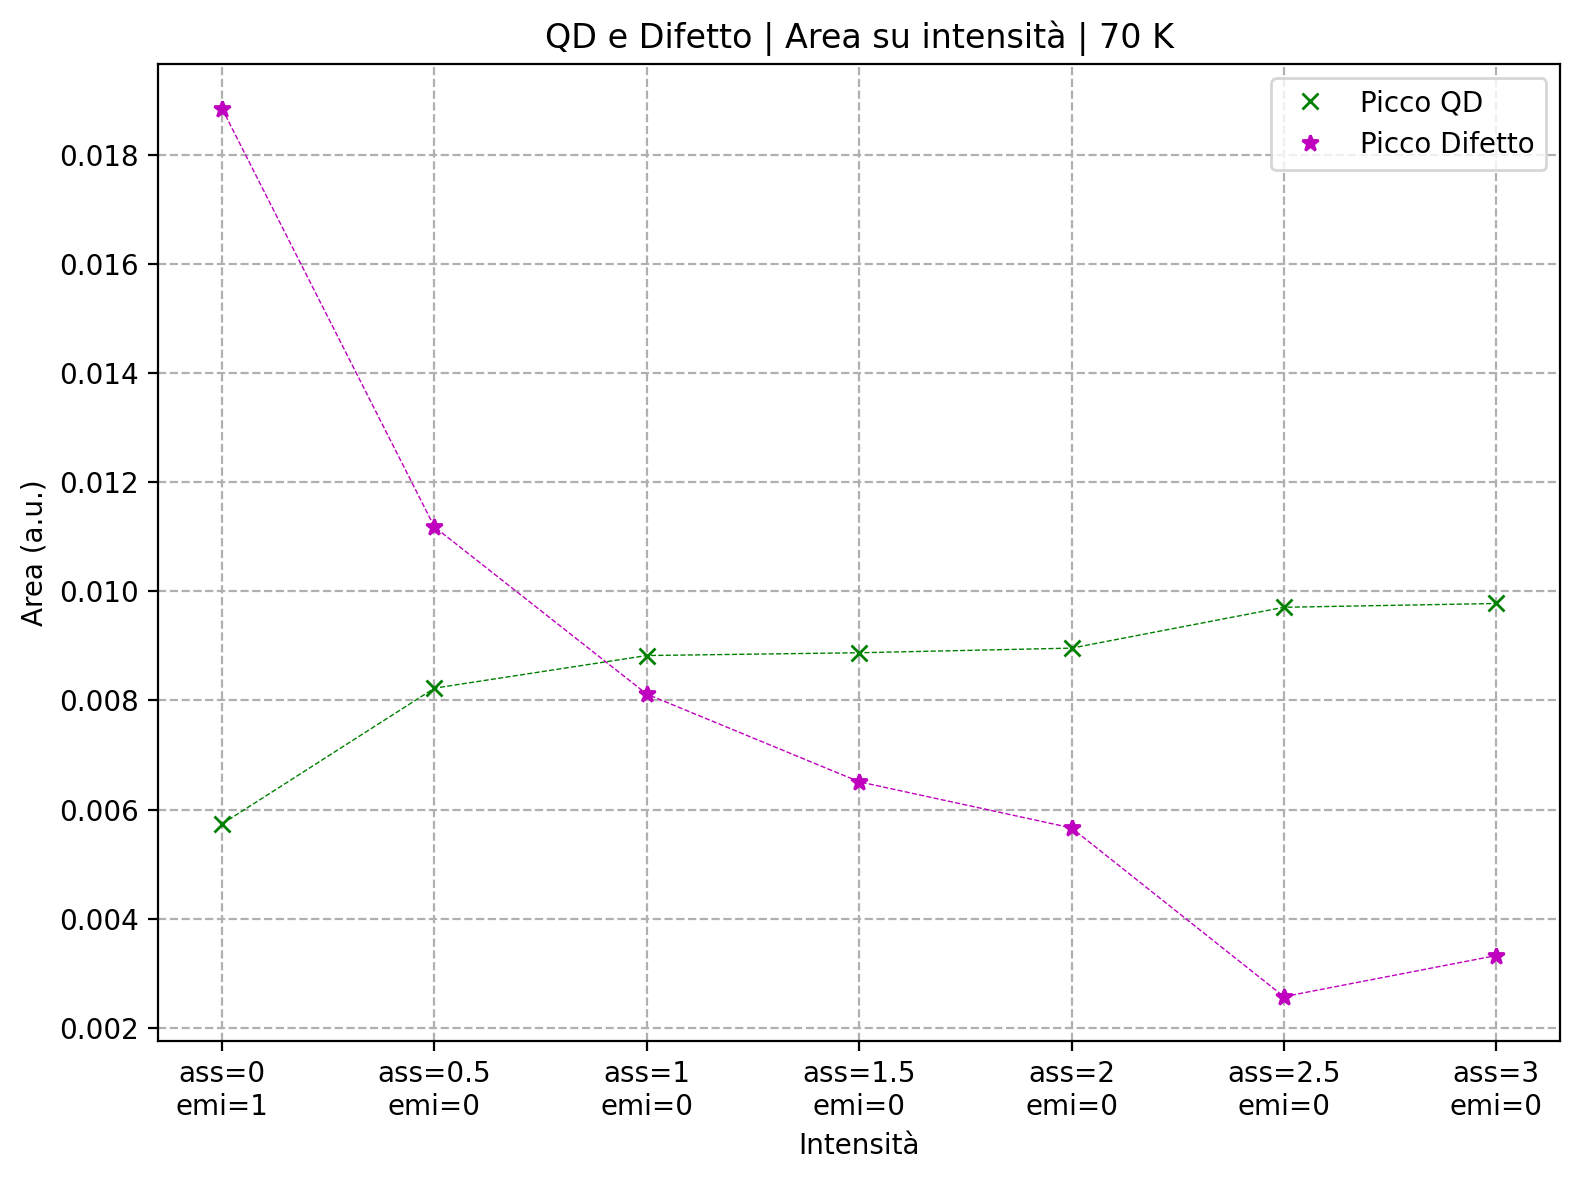

area picco QD:
[np.float64(0.005738097750760319), np.float64(0.00822575564272825), np.float64(0.008823859927271235), np.float64(0.008874741157387928), np.float64(0.00895944987244041), np.float64(0.009708046249628632), np.float64(0.009777345609332204)]
area picco Difetto:
[np.float64(0.01884603791574354), np.float64(0.011181214108070587), np.float64(0.008117299410369034), np.float64(0.006510647521977055), np.float64(0.005664875583091116), np.float64(0.002573575678080547), np.float64(0.0033268976018630382)]


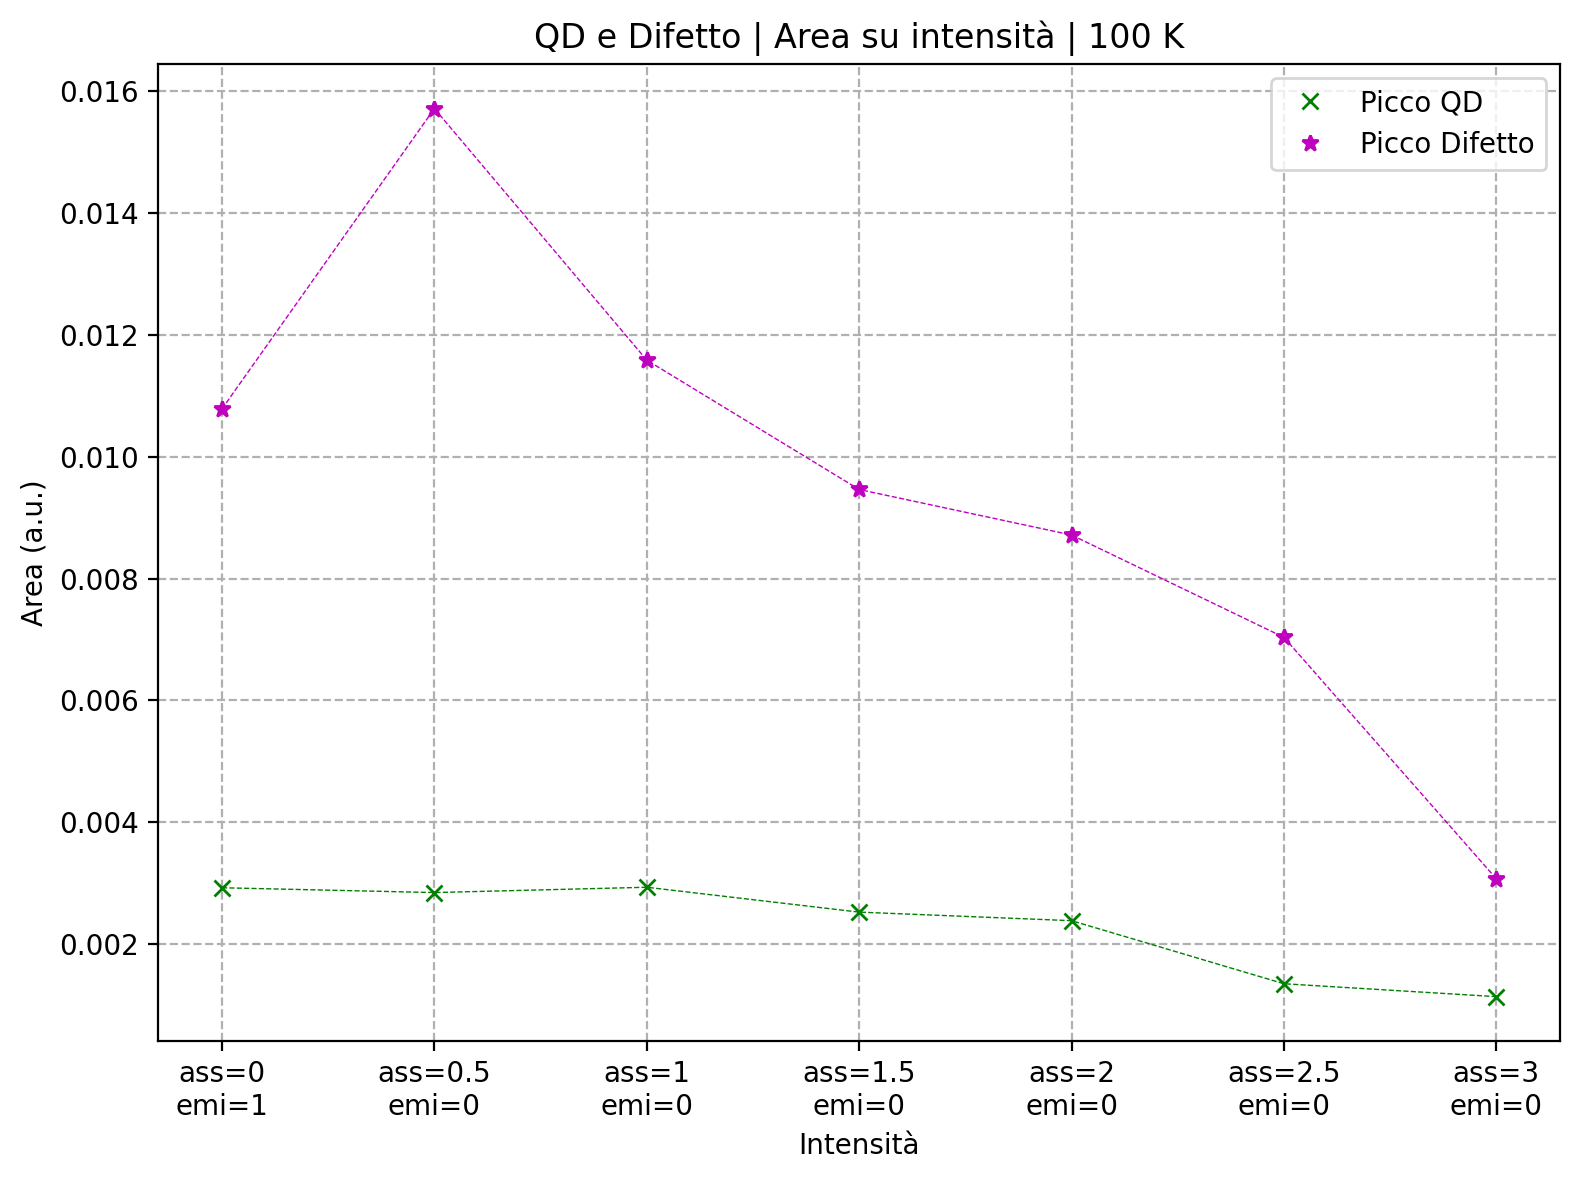

area picco QD:
[np.float64(0.0029279721614909127), np.float64(0.0028491864905477705), np.float64(0.0029363424576816445), np.float64(0.0025283752442224246), np.float64(0.0023879027635887937), np.float64(0.0013533549363333082), np.float64(0.001141902813245963)]
area picco Difetto:
[np.float64(0.010783902438326439), np.float64(0.01570944727510676), np.float64(0.011582888685564001), np.float64(0.009461052814292903), np.float64(0.008714288393026941), np.float64(0.007035527077259746), np.float64(0.0030762619941627385)]


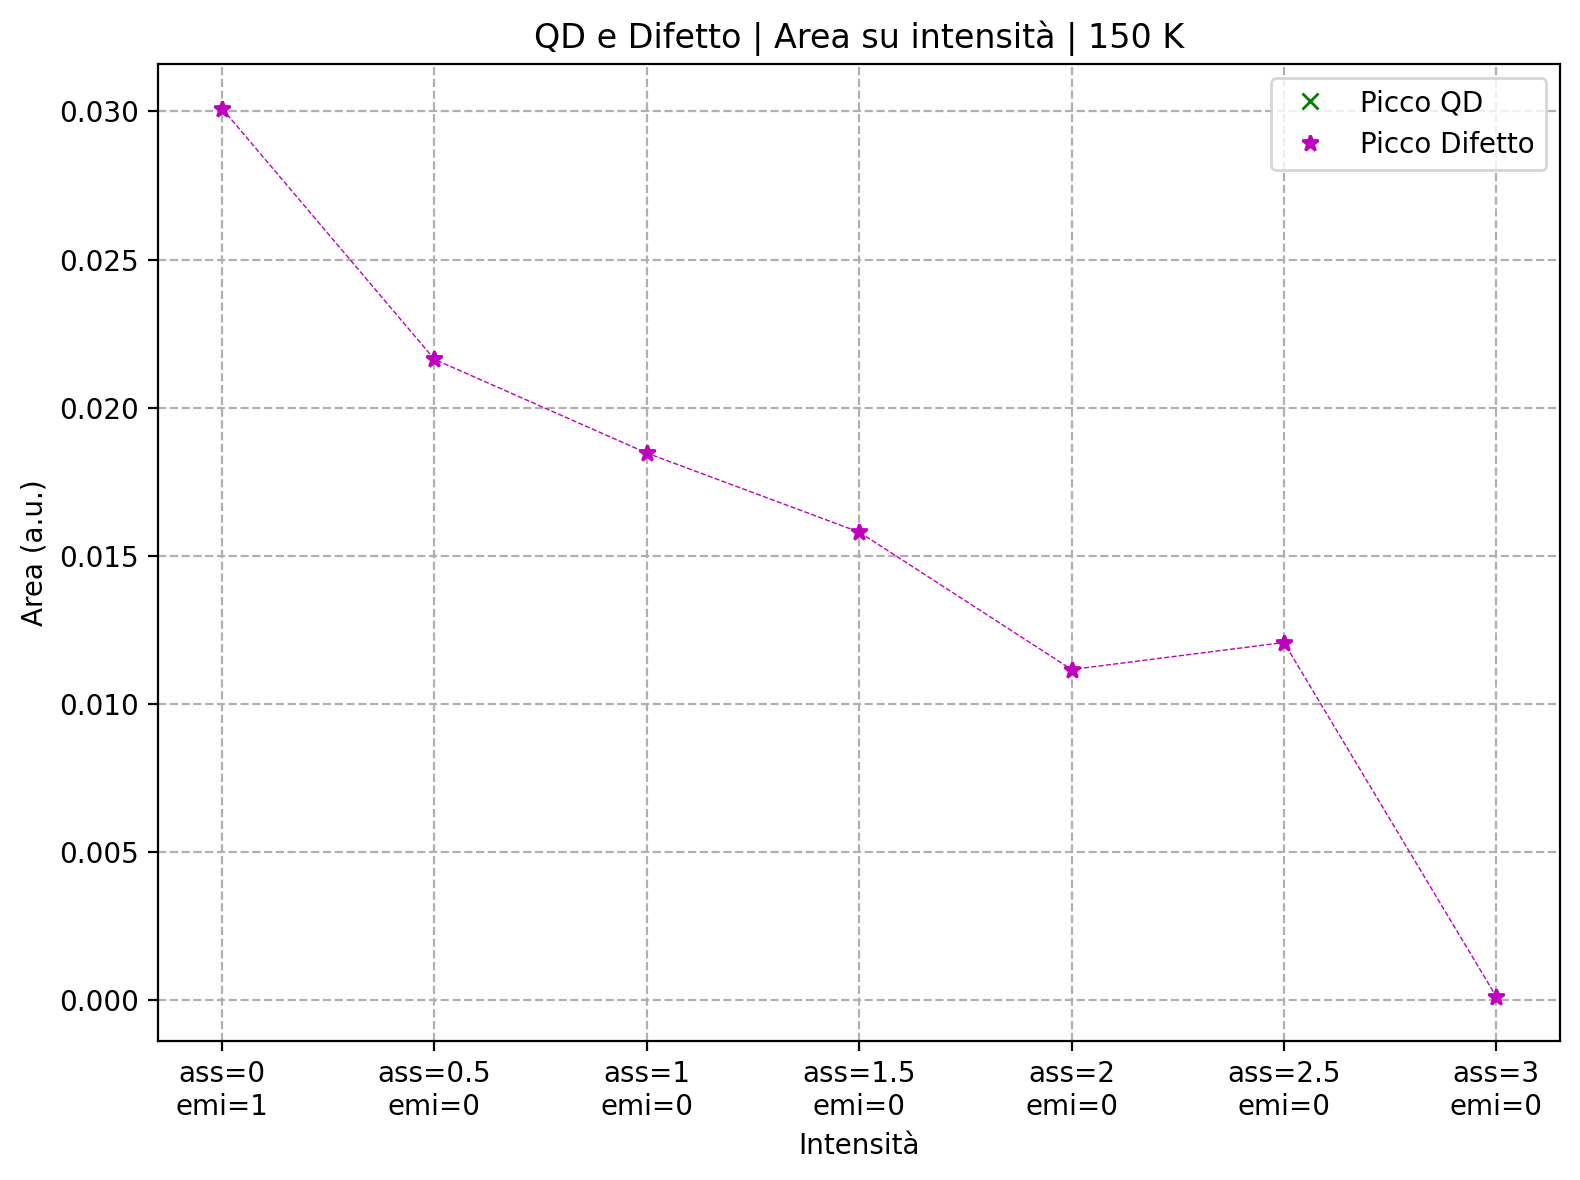

area picco QD:
[]
area picco Difetto:
[np.float64(0.03009886581808586), np.float64(0.02163208913029981), np.float64(0.01846858127200372), np.float64(0.015799906736668402), np.float64(0.011162349891366276), np.float64(0.012073415122215199), np.float64(0.0001185108932099828)]


In [128]:
## Plot Area su Intensità
for i, temp in enumerate(arr_temperatura):
    temp = str(temp)
    
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []

    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x2.append(i)
            x4.append(i)
        
            # fwhm picco sx 2
            y2.append(intensità[temp][ass][emi][0])
            # fwhm dx 2
            y4.append(intensità[temp][ass][emi][1])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]

    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    
    # I VALORI SI SOVRAPPONGONO, NON SERVONO DUE GRAFICI 
    
    plt.figure(figsize=(8, 6), dpi=200)
    
    plt.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco QD', markersize=6, elinewidth=0, capsize=0)
    plt.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
    if len(y4)>1:
        plt.errorbar(x4, y4, yerr=0, fmt='m*', label='Picco Difetto', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x4, y4, linestyle='--', color='m', linewidth=0.5) # unisce i punti
    
    # Aggiungere etichette e legenda
    if len(y4)>1:
        plt.title('QD e Difetto | Area su intensità | ' + temp + ' K')
    else:
        plt.title('QD | Area su intensità | ' + temp + ' K')
        
    plt.xlabel('Intensità')
    plt.xticks(range(1, 8), etichette_x)
    plt.ylabel('Area (a.u.)')
    plt.grid(linestyle='--')
    plt.legend()

    # Mostrare il grafico
    plt.tight_layout()
    plt.show()

    # STAMPA DEI VALORI
    print ('area picco QD:')
    print (y2)
    if len(y4) > 0:
        print ('area picco Difetto:')
        print (y4)


---

---

# FWHM di nuovo ma in un solo PLOT

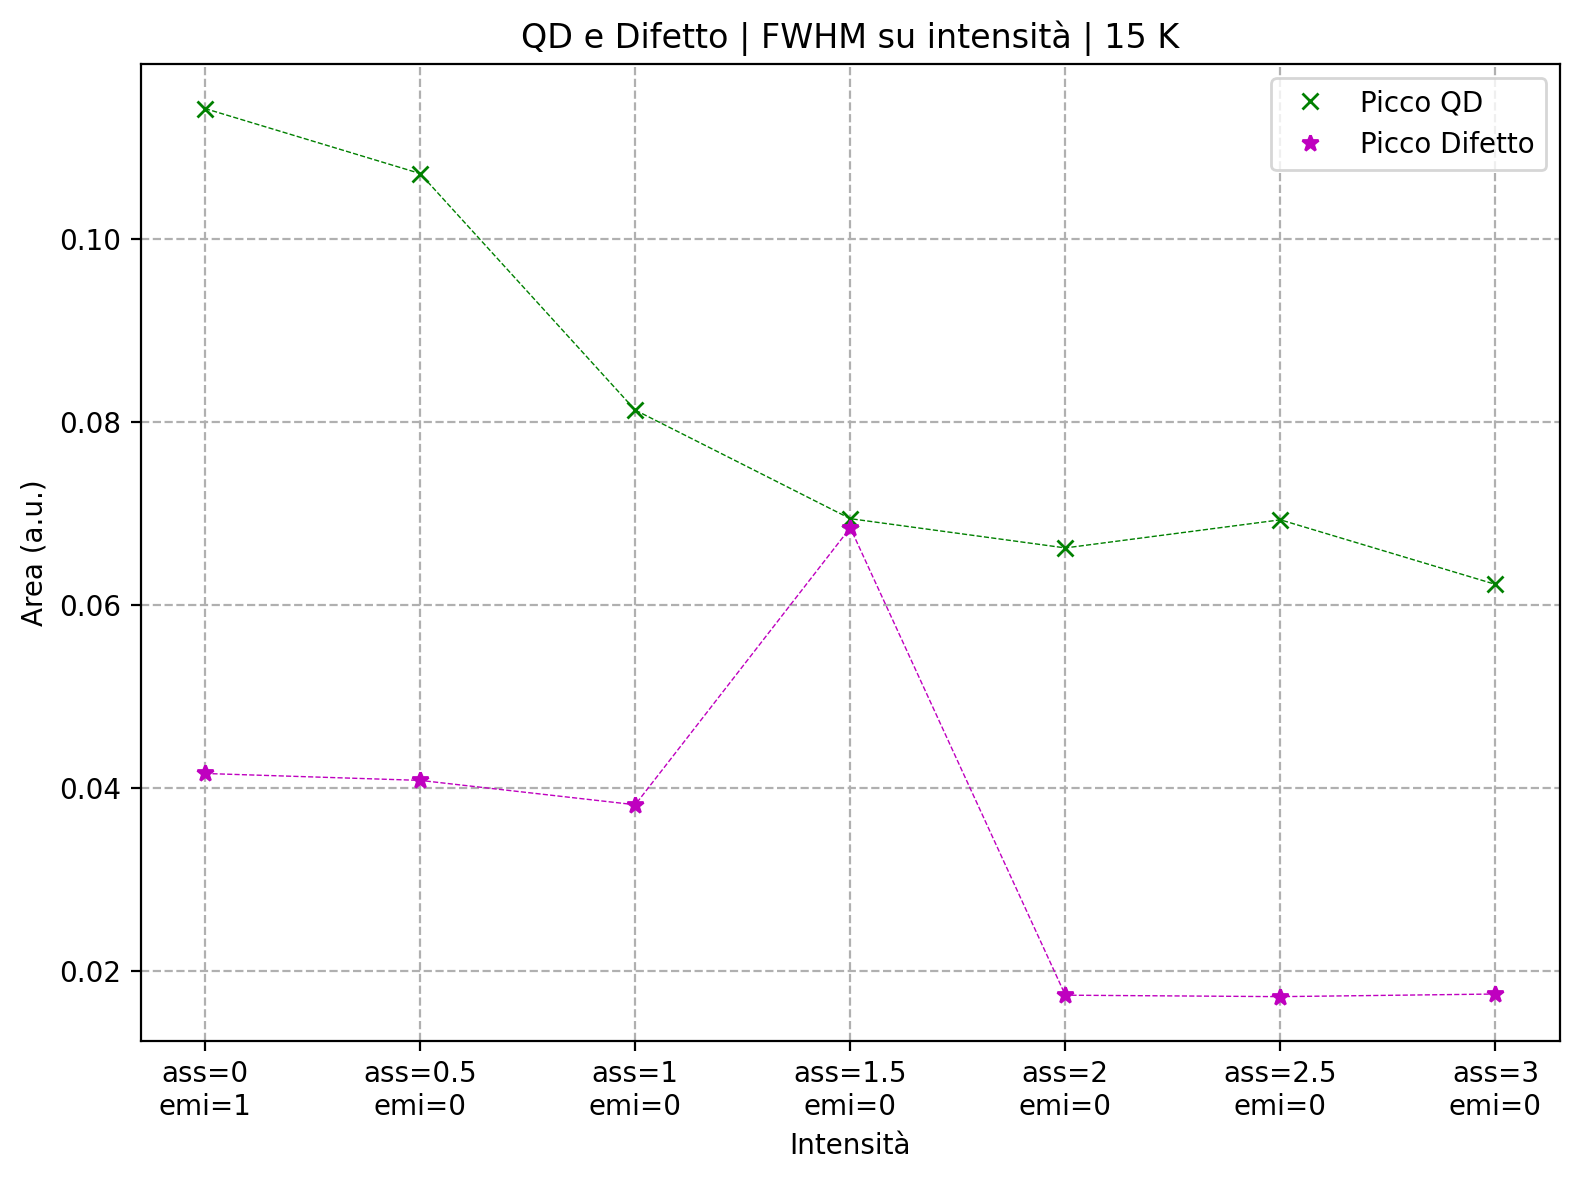

area picco QD:
[np.float64(0.11429355717860729), np.float64(0.10719397000066705), np.float64(0.08134485688673823), np.float64(0.0694793410598426), np.float64(0.06628175812308464), np.float64(0.06935339726530569), np.float64(0.06229898189213284)]
area picco Difetto:
[np.float64(0.041634435567718314), np.float64(0.04087952992765462), np.float64(0.03821749404317833), np.float64(0.06848452995647915), np.float64(0.017407431849471345), np.float64(0.01724779802805404), np.float64(0.01753367634934032)]


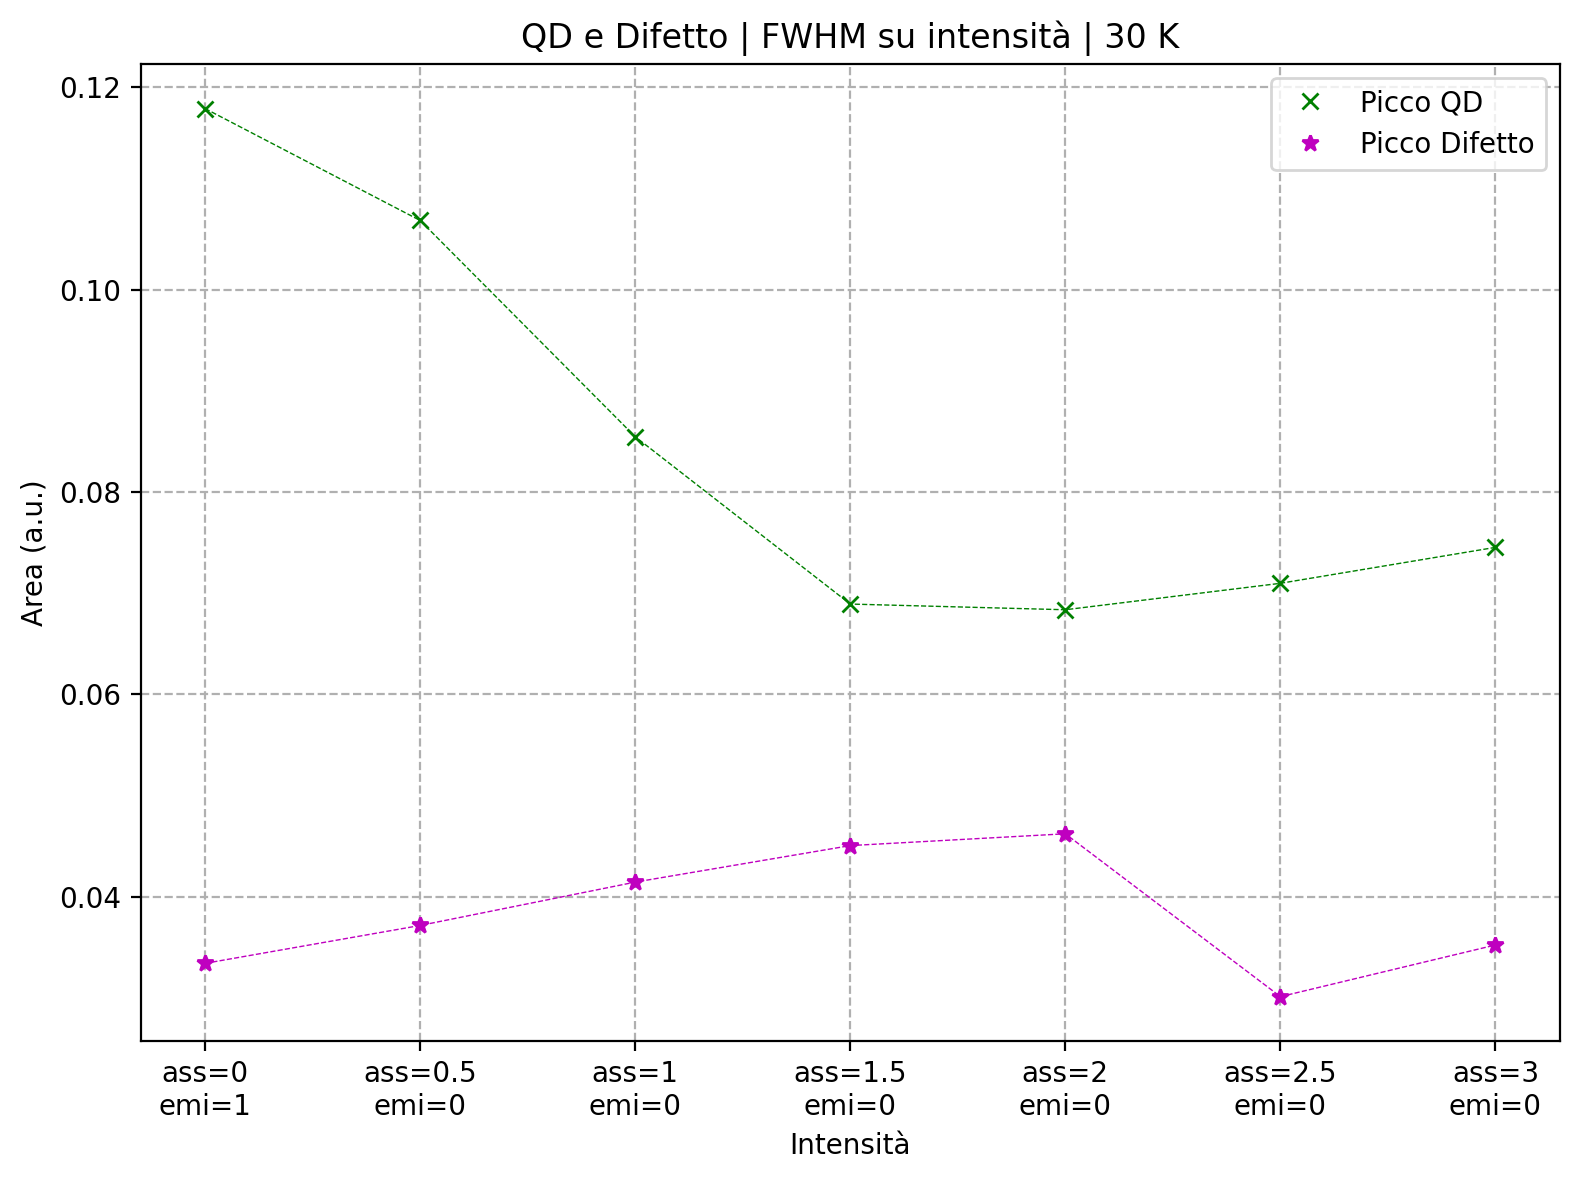

area picco QD:
[np.float64(0.11788429741077228), np.float64(0.10682849346256362), np.float64(0.08546083030670022), np.float64(0.06892679716540541), np.float64(0.06836423786015736), np.float64(0.07097762998070374), np.float64(0.07452948780445763)]
area picco Difetto:
[np.float64(0.0334258573351487), np.float64(0.0371692527355341), np.float64(0.04145309737964268), np.float64(0.045062304091819216), np.float64(0.04622788446179819), np.float64(0.0301372428954582), np.float64(0.03524177495564939)]


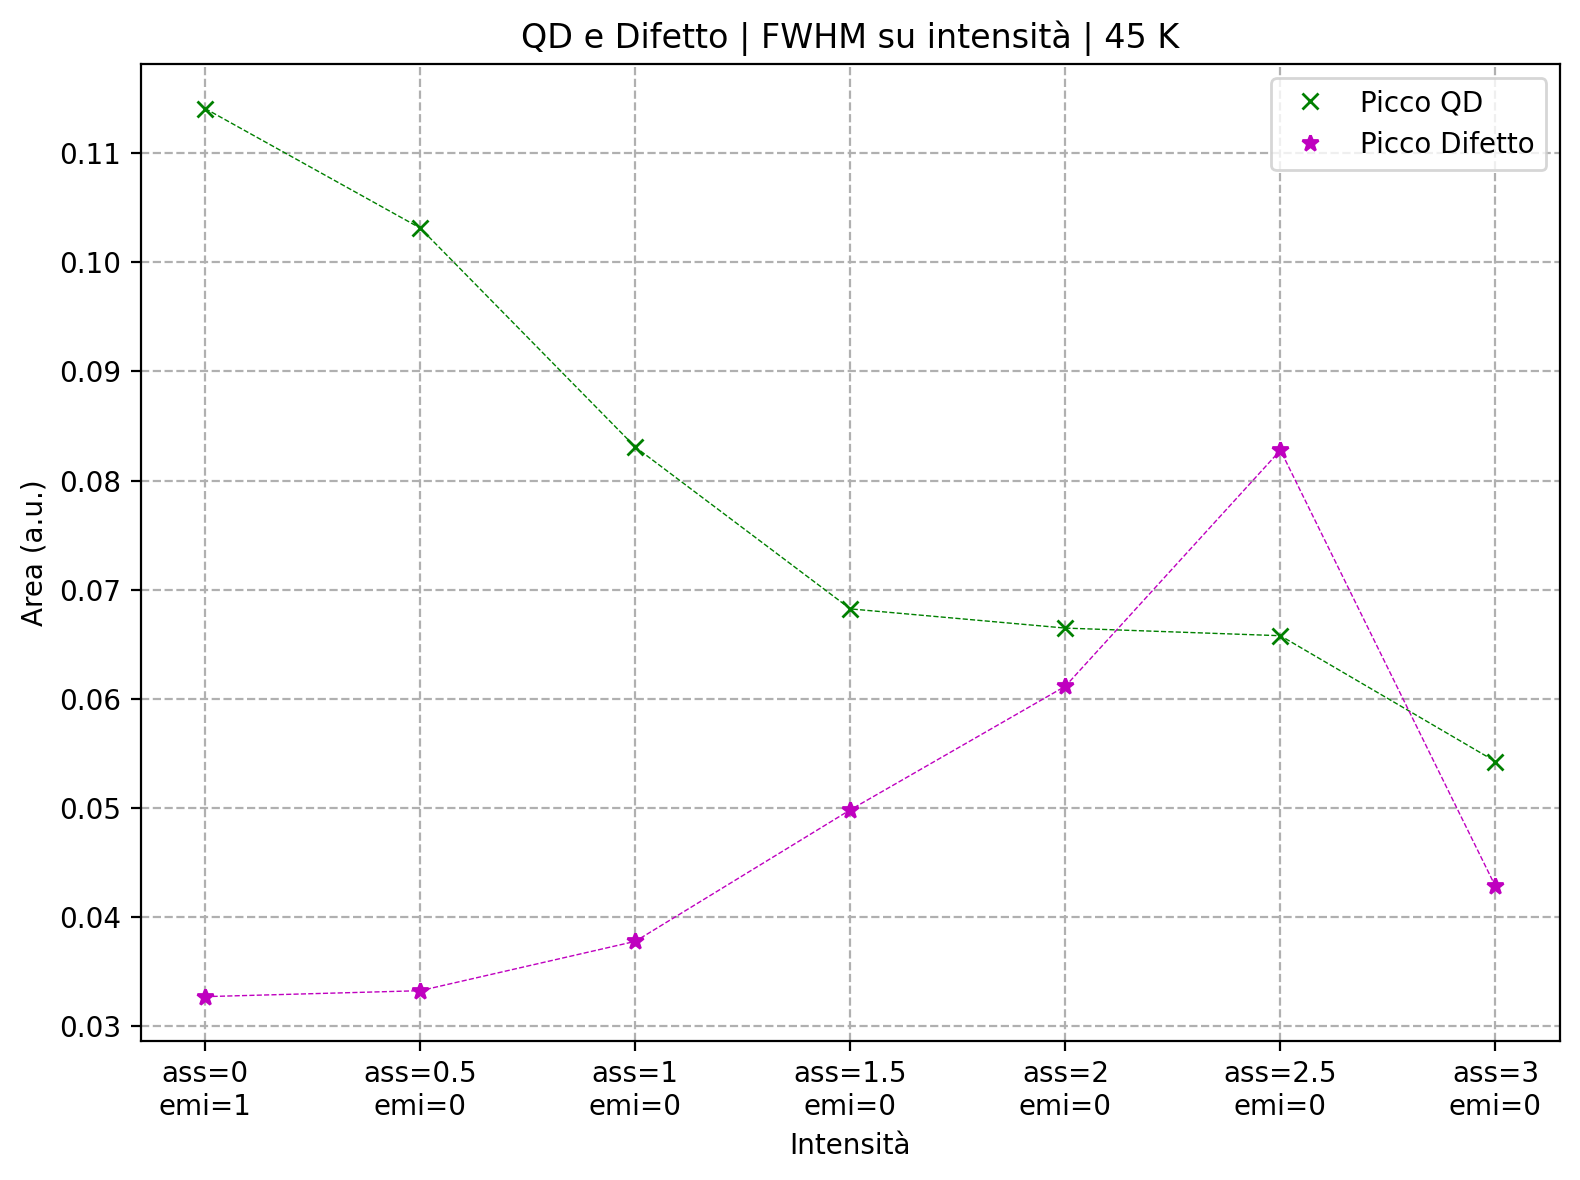

area picco QD:
[np.float64(0.11409906744830321), np.float64(0.10314503928588548), np.float64(0.0830757269127158), np.float64(0.0682377266368752), np.float64(0.06647809901878328), np.float64(0.06577867327798904), np.float64(0.05424812926388026)]
area picco Difetto:
[np.float64(0.03269483662062646), np.float64(0.033239952015658755), np.float64(0.0377635848842524), np.float64(0.04982045267917676), np.float64(0.061150154640172226), np.float64(0.0827833563986356), np.float64(0.042794069880543746)]


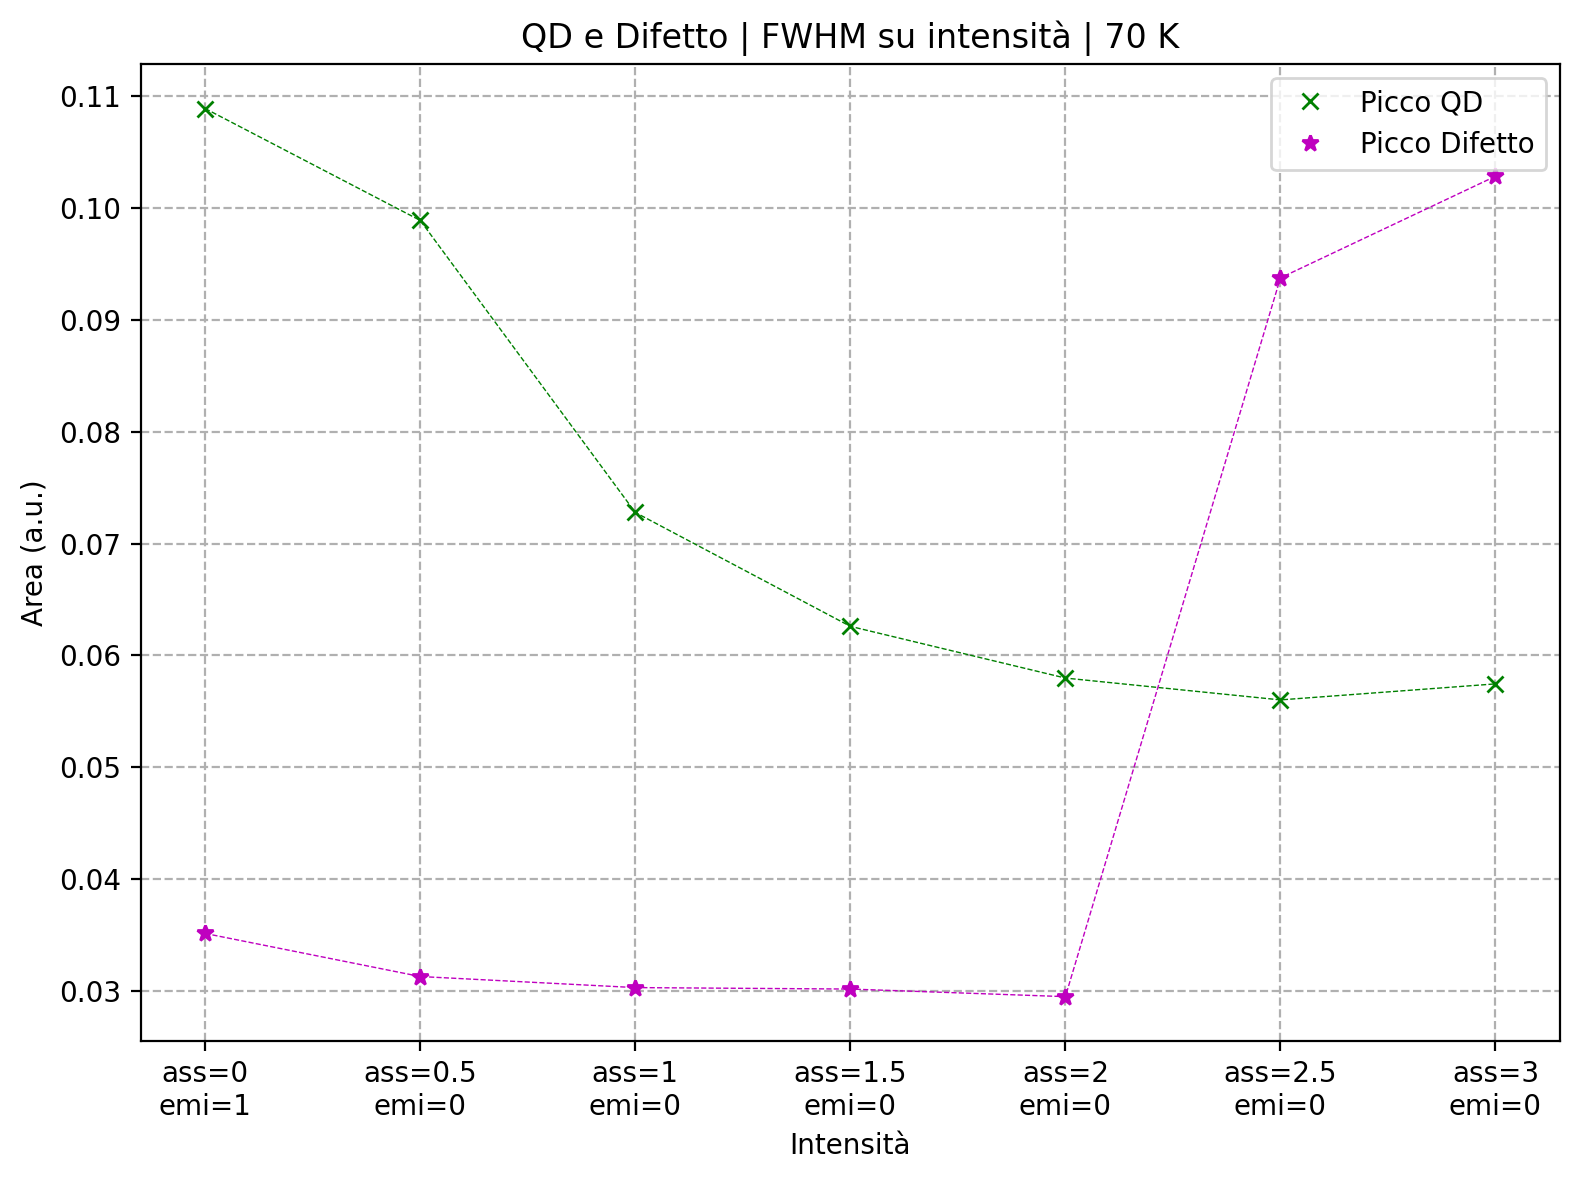

area picco QD:
[np.float64(0.10889787531868582), np.float64(0.09889562007112015), np.float64(0.07278394095849199), np.float64(0.06260029561336478), np.float64(0.057974617252347586), np.float64(0.05602201283078248), np.float64(0.05745435401899482)]
area picco Difetto:
[np.float64(0.03513790085800624), np.float64(0.031287131616620674), np.float64(0.030297490326527718), np.float64(0.030166899222811055), np.float64(0.029488171573263368), np.float64(0.09375881394566002), np.float64(0.10284509907529694)]


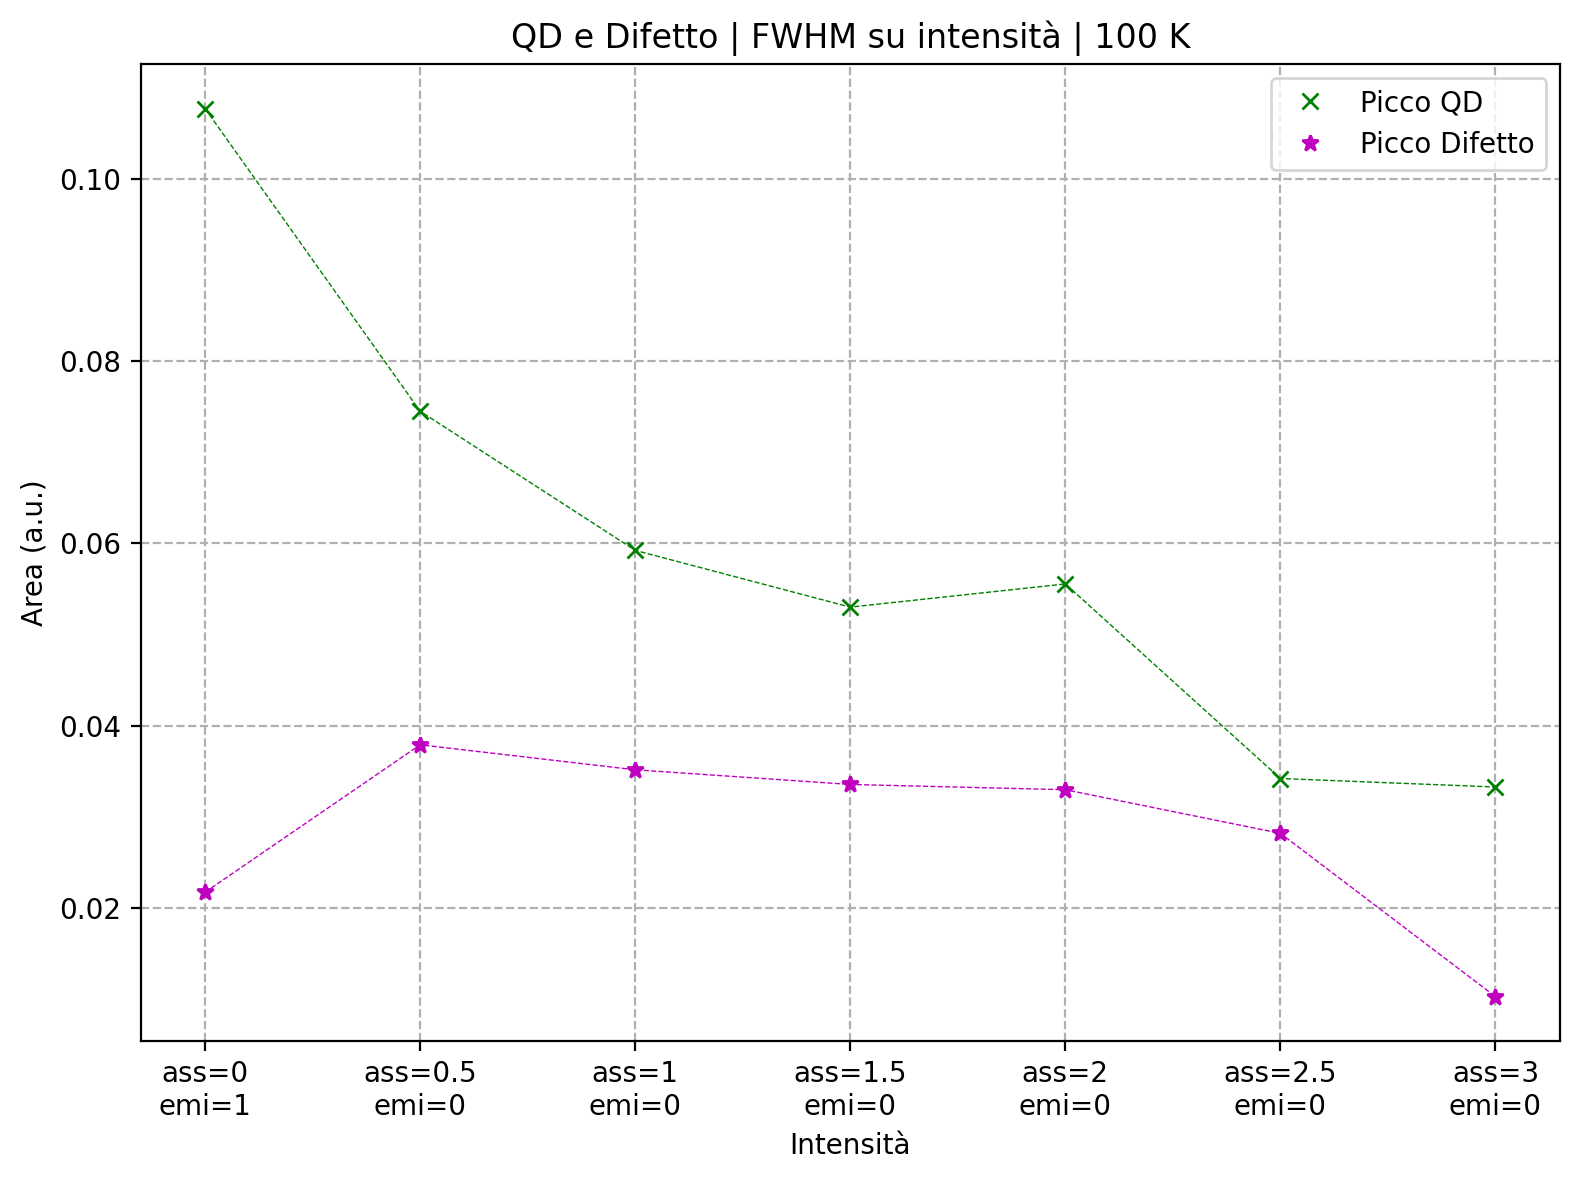

area picco QD:
[np.float64(0.10766952107899525), np.float64(0.07449393378792854), np.float64(0.05924395061555568), np.float64(0.05302187648333746), np.float64(0.055564197657346576), np.float64(0.034237063380868855), np.float64(0.03330469844320816)]
area picco Difetto:
[np.float64(0.02176823694587869), np.float64(0.03793248972788473), np.float64(0.03519220938250116), np.float64(0.03358539940364133), np.float64(0.03300858935859636), np.float64(0.028224824699969907), np.float64(0.010326501076309433)]


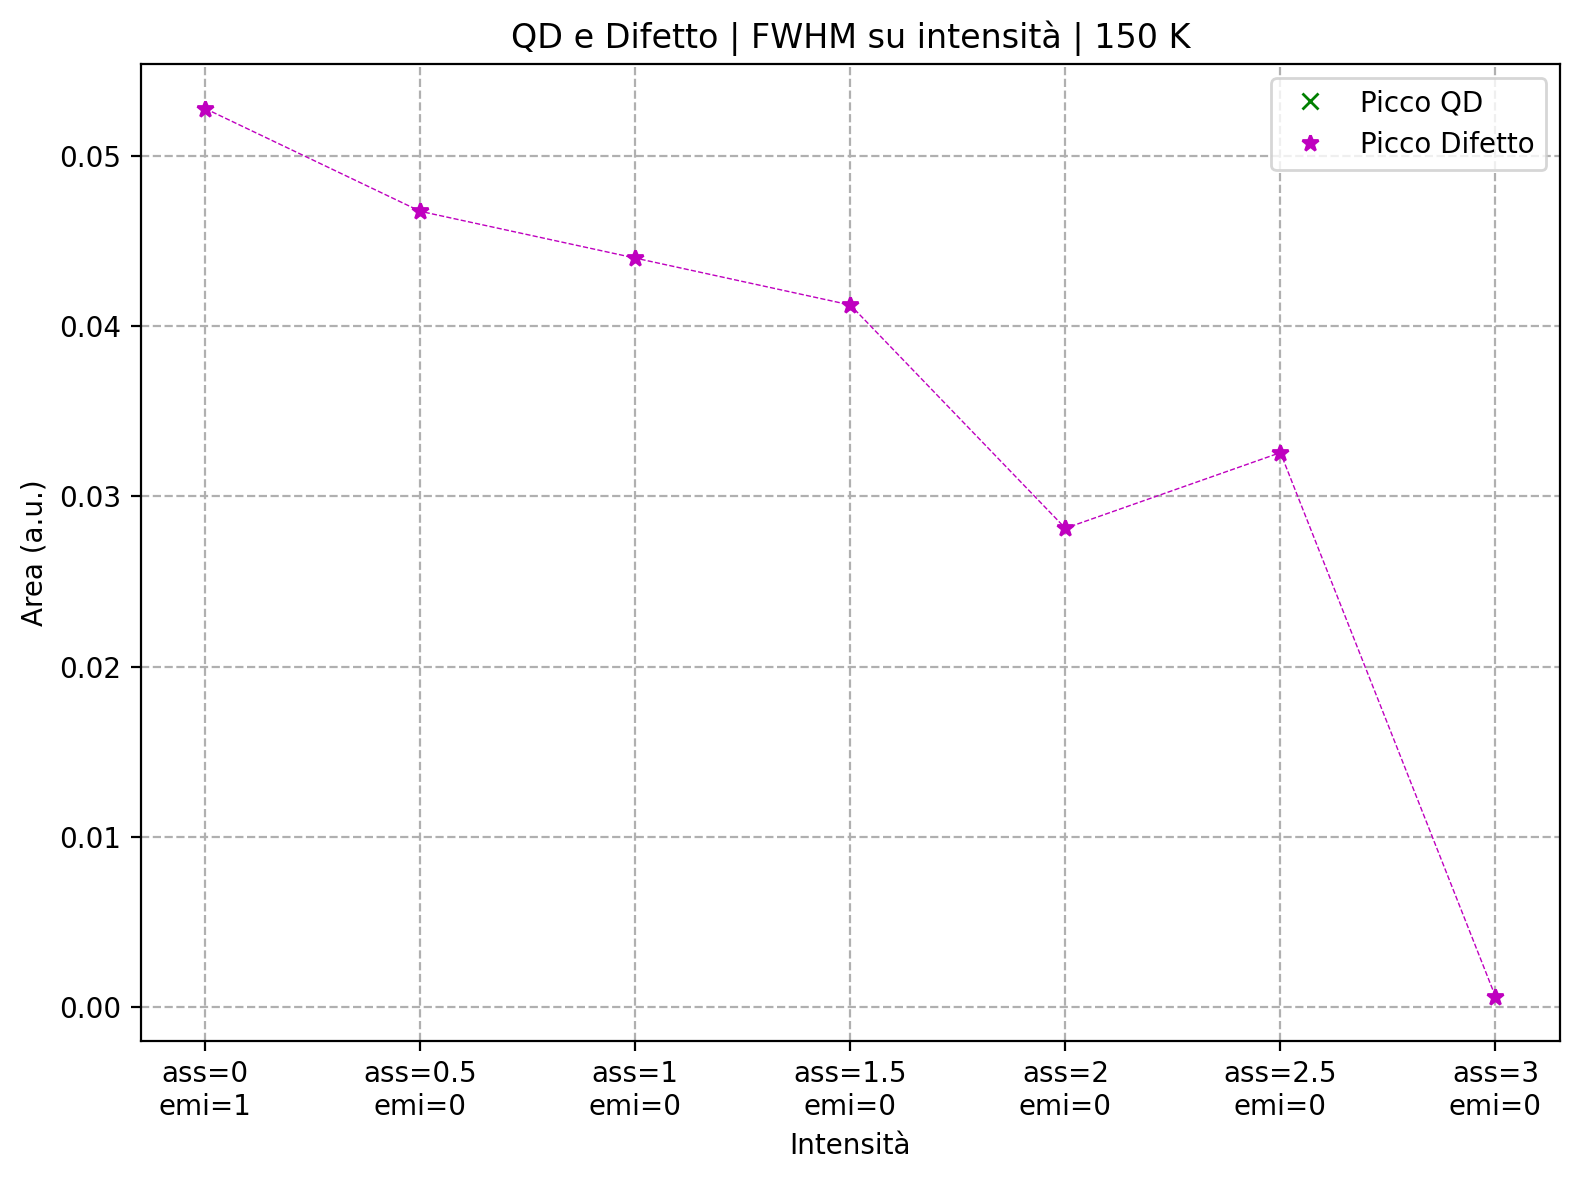

area picco QD:
[]
area picco Difetto:
[np.float64(0.05280459223660674), np.float64(0.04676540648836484), np.float64(0.04401424421768097), np.float64(0.04125592460516561), np.float64(0.028129133911439258), np.float64(0.03257710823661268), np.float64(0.0005920145381867312)]


In [129]:
## Plot Area su Intensità
for i, temp in enumerate(arr_temperatura):
    temp = str(temp)
    
    # picco sx 2
    x2 = []
    y2 = []
    err_y2 = []
    # picco dx 2
    x4 = []
    y4 = []
    err_y4 = []

    i = 1

    for ass in d_o_ass:
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            x2.append(i)
            x4.append(i)
        
            # fwhm picco sx 2
            y2.append(fwhm[temp][ass][emi][0])
            # fwhm dx 2
            y4.append(fwhm[temp][ass][emi][1])
            
            i += 1
            
    # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
    x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
    y2 = [y_val for y_val in y2 if y_val != 0]

    x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
    y4 = [y_val for y_val in y4 if y_val != 0]
    
    # I VALORI SI SOVRAPPONGONO, NON SERVONO DUE GRAFICI 
    
    plt.figure(figsize=(8, 6), dpi=200)
    
    plt.errorbar(x2, y2, yerr=0, fmt='gx', label='Picco QD', markersize=6, elinewidth=0, capsize=0)
    plt.plot(x2, y2, linestyle='--', color='g', linewidth=0.5) # unisce i punti
    if len(y4)>1:
        plt.errorbar(x4, y4, yerr=0, fmt='m*', label='Picco Difetto', markersize=6, elinewidth=0, capsize=0)
        plt.plot(x4, y4, linestyle='--', color='m', linewidth=0.5) # unisce i punti
    
    # Aggiungere etichette e legenda
    if len(y4)>1:
        plt.title('QD e Difetto | FWHM su intensità | ' + temp + ' K')
    else:
        plt.title('QD | FWHM su intensità | ' + temp + ' K')
        
    plt.xlabel('Intensità')
    plt.xticks(range(1, 8), etichette_x)
    plt.ylabel('Area (a.u.)')
    plt.grid(linestyle='--')
    plt.legend()

    # Mostrare il grafico
    plt.tight_layout()
    plt.show()

    # STAMPA DEI VALORI
    print ('area picco QD:')
    print (y2)
    if len(y4) > 0:
        print ('area picco Difetto:')
        print (y4)


In [3]:
import os

cartella = "../fcswp/Idee/vids/temp/mmm/"

# Trova tutti i file PNG nella cartella corrente
files = sorted(f for f in os.listdir(cartella) if f.endswith('.png'))

# Rinomina i file con numerazione continua
for i, file in enumerate(files, start=1):
    nuovo_nome = f"{i:04d}{'.png'}"
    vecchio_percorso = os.path.join(cartella, file)
    nuovo_percorso = os.path.join(cartella, nuovo_nome)
    os.rename(vecchio_percorso, nuovo_percorso)

print("Rinomina completata.")

Rinomina completata.
